# CAPSTONE PROJECT - LEAD SCORE ANALYSIS

**Prepared and Submitted by : Vinay Chawla**

*Date of Submission : 23 Feb 2025*

**Project Introduction:**

A Company Called X Education that sells Online education courses wants to improve their Leads success ratio from 30% (Current) to 80% . 

**Problem Statement:** Company X Educations Needs to increase the same above 80%.

**Project Objective:** Calculate Lead score for each lead. find the right threshold above which if calls are prioritized, the success rate is higher than 80%. 

**Input Information:** 
    
    *What is a Lead?: The company markets its courses on several websites, search engines, and even social media sometimes. Once these people land on the website, they might browse the courses, fill out a form for the course, or watch some videos. When these people fill out a form with their email address or phone number, they are classified as leads.

    *Hot Leads : Most Potential leads that have high potency to be converted to Successful sales.


    *present succes sale conversion of leads : 30%

	*Usual input for leads : 

		Social media marketing such as : 
			website visits. visitors fill some forms which generates leads.
			Past referals.


	*Usual Lead to sales conversion process : Social media marketing input --> initial pool of leads --> HOT leads --> Converted sales.
	Same is described in the image below : 
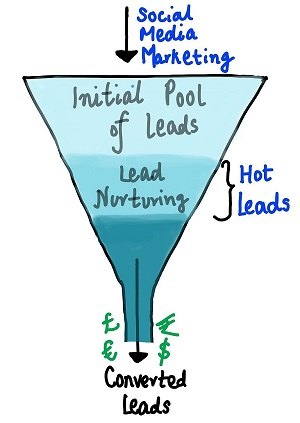



**Steps involved in the Project**

1. Import Necessary libraries

2. Data Upload and Understanding of dataframe

3. Cleaning and Exploration: 
    Cleaning may involve removal of unwanted columns and rows, replacement of Null values where needed with a relevant value etc.

4. Review of data to check what kind of machine learning model can be applied. 

5. Transformation of data to prepare it for modelling. 
    --> Conversion of Categorical data to Numerical.
    --> Managing Outliers if any. 
    --> 

6. Model building with cleaned and relevant data.

In [1]:
# 1. Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,  roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder




import os 
os.chdir(r'D:\E Drive\bootcamp\Machine learning\CAPSTONE PROJECT')

In [2]:
# Ignore warnings to keep notebook clean
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 2. Importing the dataset

lead = pd.read_csv('Leads.csv')
# 2.1 Displaying the first 5 rows of the dataset
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
#  2.2 Displaying data info
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#  3. Data Preprocessing and EDA

#  3.1 Checking for Null values
lead.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Lead Origin                 

Dataset contains some columns that have high Null values. Such columns may not be of much use as Null count seems high. let's clear such columns based on a threshold for Null count to say : 45%. 


In [6]:
# 3.1 Remove the columns with more than 45% missing (NULL) values

for col in lead.columns:
    if lead[col].isnull().sum() >0.45*lead.shape[0]:
        lead.drop(col, axis=1, inplace=True)

lead.isnull().sum().sort_values(ascending=False)

# A total of 5 columns have been removed with this procedure based on high null count in the columns

Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Prospect ID                                         0
Do Not Call                                         0
Converted                                           0
Lead Origin                                         0
Total Time Spent on Website                         0
Do Not Email                                        0
Lead Number                 

In [7]:
# 3.2 Code to check if the main column for primary key of data is having any duplicay. if so, we should delete the duplicate rows and clean the data.

[lead['Prospect ID'].value_counts()>1]==True

[lead['Lead Number'].value_counts()>1] ==True


False

*No duplicacy found in Prospect ID and Lead Number column. Hence, no changes / corrections needed.However since these 2 columns are just IDs and cannot help in analysis, dropping both.*

In [8]:
lead.drop(columns={'Prospect ID', 'Lead Number'}, inplace=True)

In [9]:
lead.isnull().sum().sort_values(ascending=False)

Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Converted                                           0
Lead Origin                                         0
Total Time Spent on Website                         0
Do Not Email                                        0
Do Not Call                                         0
Search                                              0
Newspaper                   

In [10]:
# 3.3 Handling "SELECT" values in the dataset. 
# We will replace "SELECT" values with NaN as the dataset indicates that "SELECT" values are  nothing but data not entered by user, which is equivalent to NaN.


lead = lead.replace('Select', np.nan)

In [11]:
lead.isnull().sum().sort_values(ascending=False)

# Upon Re-checking the Nulls count, it is seen that after handling "Select" as Nan, the null count has drastically jumped up. 
# Hence, need to clear the Null Heavy columns again with same thumb rule of limiting Nulls below 45%. 


How did you hear about X Education               7250
Lead Profile                                     6855
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Converted                                           0
Lead Origin                                         0
Total Time Spent on Website                         0
Do Not Email                                        0
Do Not Call                                         0
Search                                              0
Newspaper                   

In [12]:
# Dropping the  Nulls again with same rule we used earlier.

for col in lead.columns:
    if lead[col].isnull().sum() >0.45*lead.shape[0]:
        lead.drop(col, axis=1, inplace=True)

lead.isnull().sum().sort_values(ascending=False)

City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Do Not Call                                         0
Lead Origin                                         0
Converted                                           0
Total Time Spent on Website                         0
Do Not Email                                        0
Search                                              0
X Education Forums                                  0
Newspaper                                           0
Magazine                    

Summary before going ahead : 

So far, we have removed High Null value columns having More than 45% nulls. 
we also found that when we replaced "SELECT" with NaN , we could find more columns that were "Null Heavy". Hence, repeated the Null column removal step once again. 

Status now : we are left with a total 29 columns out of which , 10 Columns still have Nulls. we should further dig deep and handle them. 

So far : Handling Outliers is also pending. also to be done in steps to come ahead. 



***To decide any further on the rest of columns, let us do some EDA to understand the data better.*** 

In [13]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

# Starting Study of Each and every Feature  to understand and refine them better. 

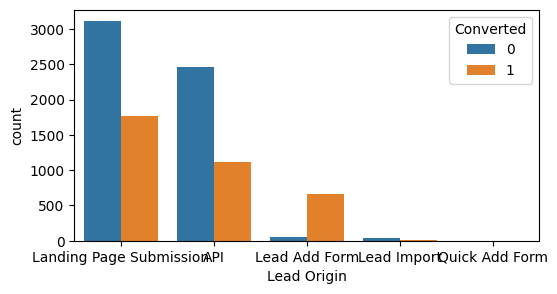

In [14]:
#  3.4 Exploratory Data analysis Column wise to visualize and understand the data better
lead['Lead Origin'].value_counts().sort_values(ascending= False)

# Landing Page Submission    4886
# API                        3580
# Lead Add Form               718
# Lead Import                  55
# Quick Add Form                1

#  Looks like an interesting parameter to explore. Plotting with Countplot

plt.figure(figsize=(6,3))
sns.countplot(data=lead, x='Lead Origin', hue='Converted', order=lead['Lead Origin'].value_counts().index)
plt.xticks(rotation=00)
plt.show()

Leads coming from "Lead Add Form" are highly successful compared to other categories. 

Since the column is reasonably well categorized, it is a valuable column for modelling. Since "Quick add form" and "Lead Import" are too low in numbers, merge them as "Others"

In [15]:
lead['Lead Origin'] = lead['Lead Origin'].replace(['Quick Add Form', 'Lead Import'] , 'Others')

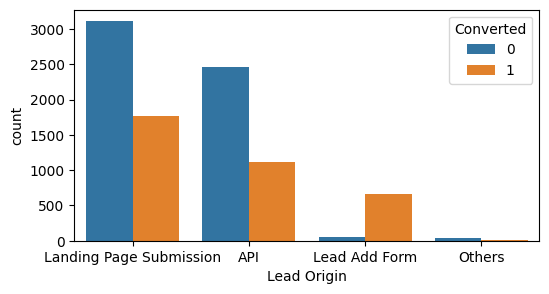

In [16]:
plt.figure(figsize=(6,3))
sns.countplot(data=lead, x='Lead Origin', hue='Converted', order=lead['Lead Origin'].value_counts().index)
plt.xticks(rotation=00)
plt.show()

In [17]:
lead['City'].isnull().sum()
#  A very big number of Nulls is available (3669)
# but since there is no direct way to find out , it is difficult to establish a method way to replace Nulls. 
# Marking them as a separate category as "Unknown"

lead['City'].fillna("Unknown", inplace=True) 

<Axes: xlabel='City', ylabel='count'>

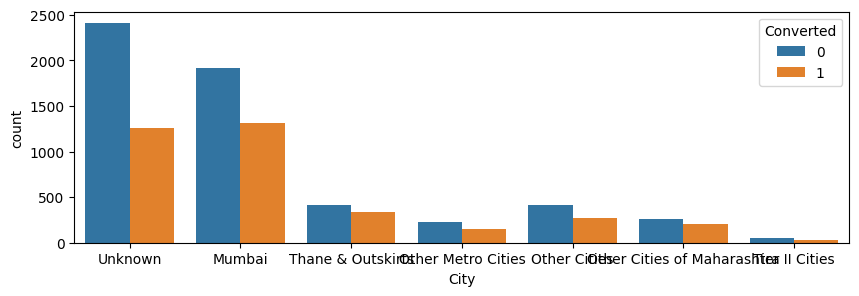

In [18]:

lead['City'].value_counts()

plt.figure(figsize=(10,3))
sns.countplot(data=lead, x='City', hue='Converted')

**Most of customer base seems to be from Mumbai and Thane put together. Ratio wise, Thane seems to exhibit better conversion ratio compared to other locations.*


However for modelling point of view, it'll be good to reduce the categories of this column to some extent. making groups as following:

1. Metro Cities : Mumbai + Other Metro Cities
2. Other cities : Thane & Outskits + Other cities + Other Cities of Maharashtra + Tier II cities. 


In [19]:
# Merging City column values as mentioned above
lead['City'] = lead['City'].replace(['Mumbai', 'Other Metro Cities'], 'Metro')
lead['City'] = lead['City'].replace(['Thane & Outskirts', 'Other Cities', 'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'], 'Other Cities')

<Axes: xlabel='City', ylabel='count'>

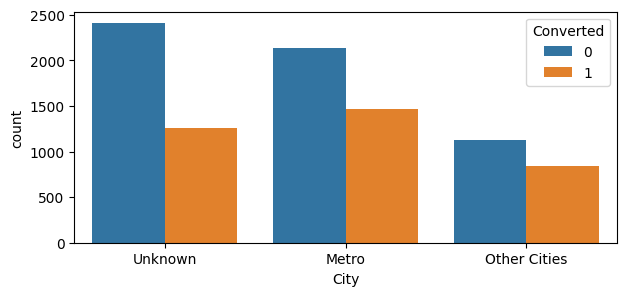

In [20]:
# Replotting
plt.figure(figsize=(7,3))
sns.countplot(data=lead, x='City', hue='Converted')

<Axes: xlabel='Country', ylabel='count'>

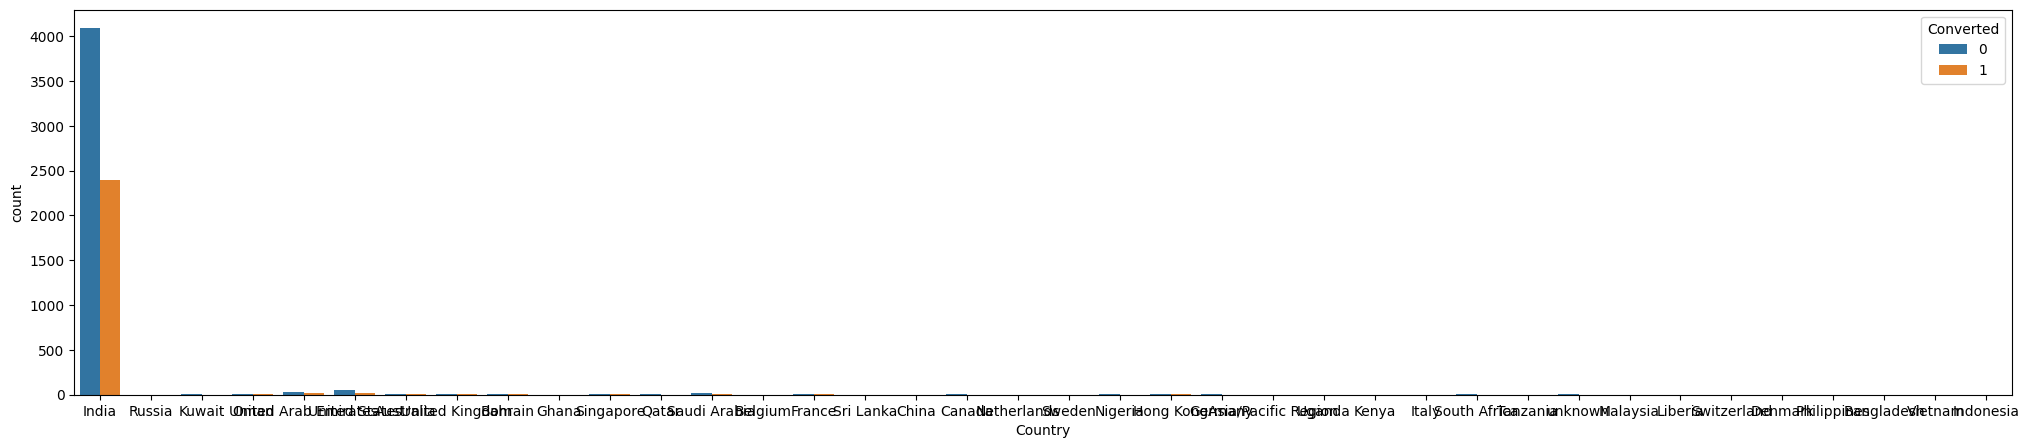

In [21]:
lead['Country'].value_counts()

plt.figure(figsize=(25,5))
sns.countplot(data=lead, x='Country', hue='Converted')

*Most of the leads are India based. Seems there is no relevance of this column as the data is too concentrated to only 1 country. we'll replace all Non India countries and also check if nulls are there to handle*

In [22]:
lead['Country'].isnull().sum()
# There are 2461 Nulls in it. Since majority of leads is from India and we cannot lose this much data as well. 
# let us convert Nulls to "India" as it is safe to assume that majority of customer base for this company is Indian.
lead['Country'].fillna('India', inplace=True)



<Axes: xlabel='Country', ylabel='count'>

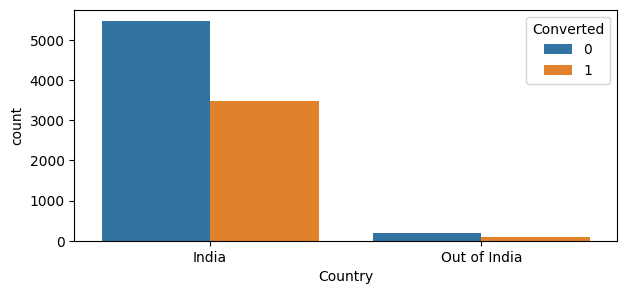

In [23]:
# Now that Nulls are removed, let us Replace all non-'India' values with 'Out of India'
# lead['Country'] = lead['Country'].replace(to_replace=r'[^India]', value='Out of India', regex=True)

# Replace all non-'India' values with 'Out of India'
lead['Country']= np.where(lead['Country']=='India', lead['Country'], "Out of India")

lead['Country'].value_counts()
plt.figure(figsize=(7,3))
sns.countplot(data=lead, x='Country', hue='Converted')

<Axes: xlabel='Digital Advertisement', ylabel='count'>

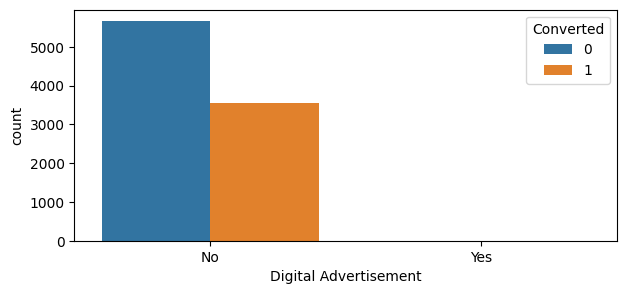

In [24]:
lead['Digital Advertisement'].value_counts()

plt.figure(figsize=(7,3))
sns.countplot(data=lead, x='Digital Advertisement', hue='Converted')

# can be dropped as not relevant

<Axes: xlabel='Do Not Call', ylabel='count'>

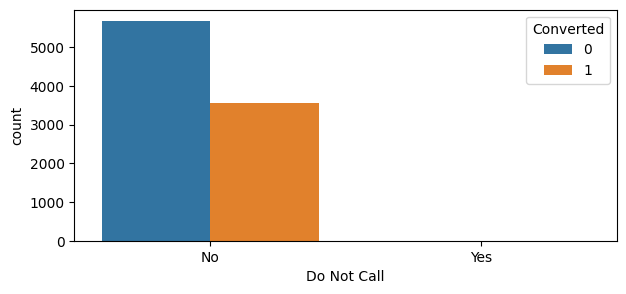

In [25]:
lead['Do Not Call'].value_counts()

plt.figure(figsize=(7,3))
sns.countplot(data=lead, x='Do Not Call', hue='Converted')
# can be dropped as not relevant

<Axes: xlabel='Do Not Email', ylabel='count'>

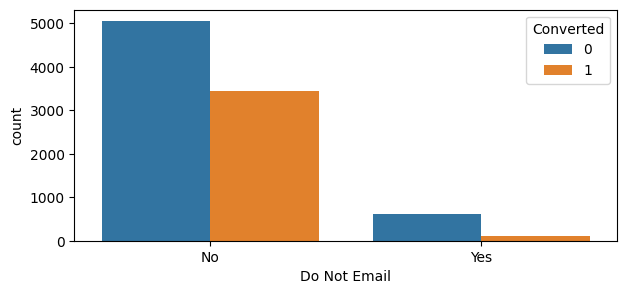

In [26]:
lead['Do Not Email'].value_counts()

plt.figure(figsize=(7,3))
sns.countplot(data=lead, x='Do Not Email', hue='Converted')
# can be dropped as not relevant

Get updates on DM Content
No    9240
Name: count, dtype: int64


<Axes: xlabel='Get updates on DM Content', ylabel='count'>

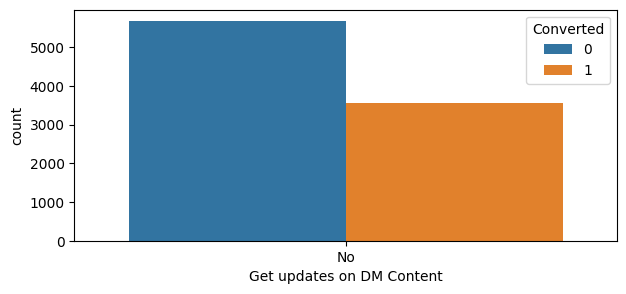

In [27]:
print(lead['Get updates on DM Content'].value_counts())
plt.figure(figsize=(7,3))
sns.countplot(data=lead, x='Get updates on DM Content', hue='Converted')
# can be dropped as not relevant

Columns checked above , i.e. - Do not call, Do not email, get update on DM Content - are having data too concentrated in one category which indicates it is not of use for analysis. Hence , to be dropped along with "Country" as well

In [28]:
# lead.drop(columns = {'Country', 'Do Not Email', 'Do Not Call', 'Get updates on DM Content'}, inplace=True)

lead.drop(columns = {'Country', 'Do Not Call', 'Get updates on DM Content'}, inplace=True)

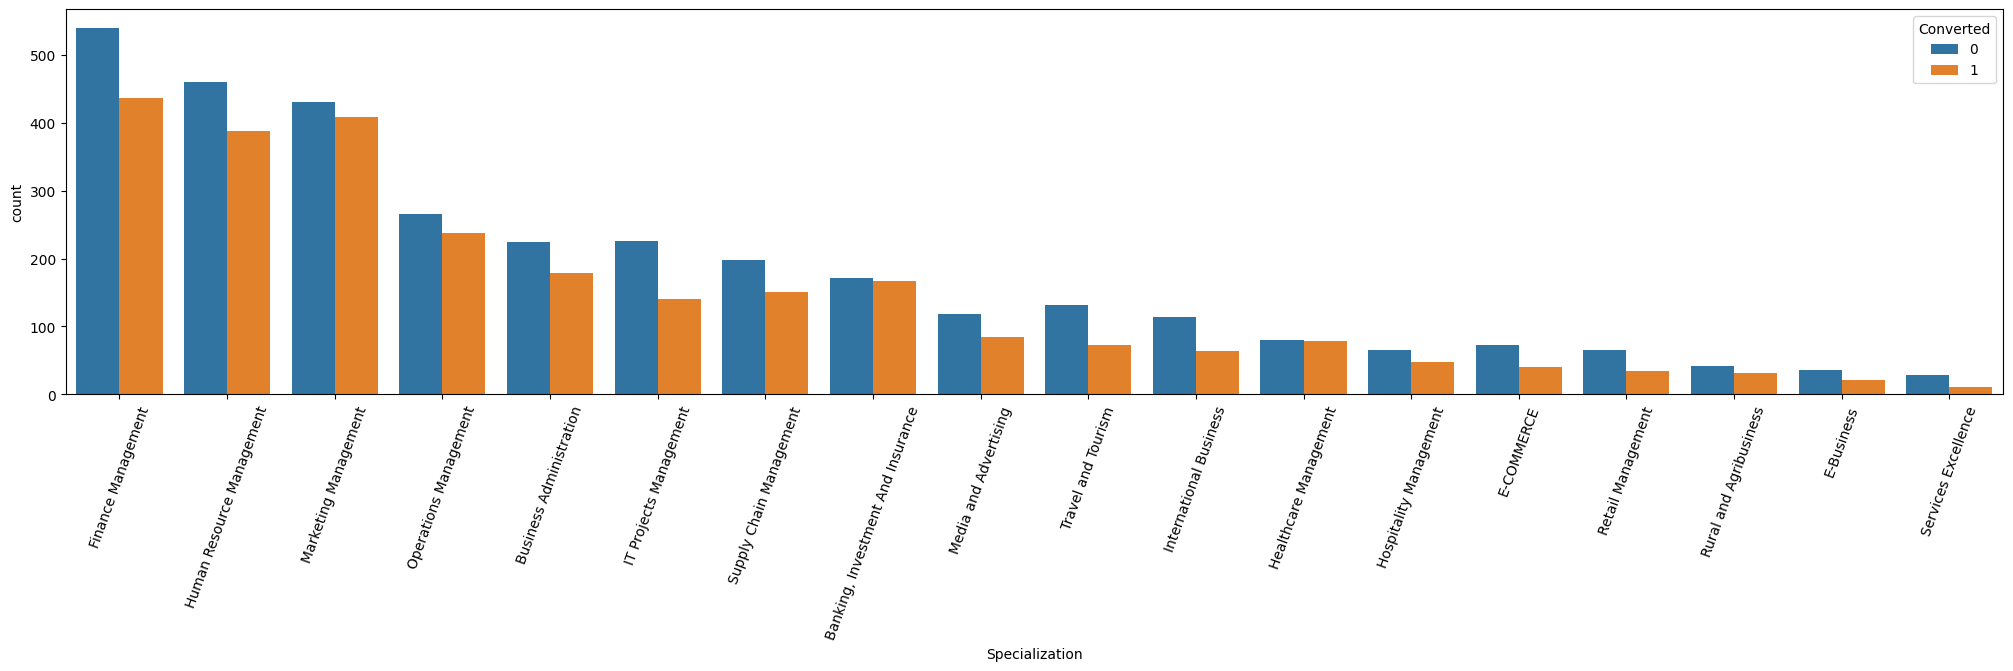

In [29]:
lead['Specialization'].value_counts()

plt.figure(figsize=(25,5))
sns.countplot(data=lead, x='Specialization', hue='Converted', order=lead['Specialization'].value_counts().index)
plt.xticks(rotation=70)
plt.show()

**Majorly , Management field leads are high success potential**

This column information could be important. however, categories are too many. A Logical merging of categories could help make it easier for analysis.
1. Merge all "Management" Specializations to 1 type "Management" . 
2. Merge specializations with less than 100 Count to 1 type as "others". 


In [30]:
lead['Specialization'].value_counts().sort_values(ascending=False)

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [31]:
lead['Specialization'] = lead['Specialization'].replace(['Finance Management', 'Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],'Management Specializations')


In [32]:
spc_count = lead['Specialization'].value_counts()

filtered_spc = spc_count[spc_count<100].index

filtered_spc

Index(['Rural and Agribusiness', 'E-Business', 'Services Excellence'], dtype='object', name='Specialization')

In [33]:
lead['Specialization']= lead['Specialization'].replace(filtered_spc, 'Others')

In [34]:
lead['Specialization'].value_counts()


Specialization
Management Specializations           4253
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Others                                170
E-COMMERCE                            112
Name: count, dtype: int64

In [35]:
print(lead['Specialization'].value_counts().sort_values(ascending=False))

# Also , checking if there are nulls in this column

lead['Specialization'].isnull().sum()  # 3380 Nulls are there. 
# cannot remove this many records but handling it also is necessary as it may impact the outcome. 
# Converting all NaN  to "Unknown" as clear linkage to apply K-Nearest Neighbours is not known so far. 

lead['Specialization'].fillna('Unknown', inplace=True)


Specialization
Management Specializations           4253
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Others                                170
E-COMMERCE                            112
Name: count, dtype: int64


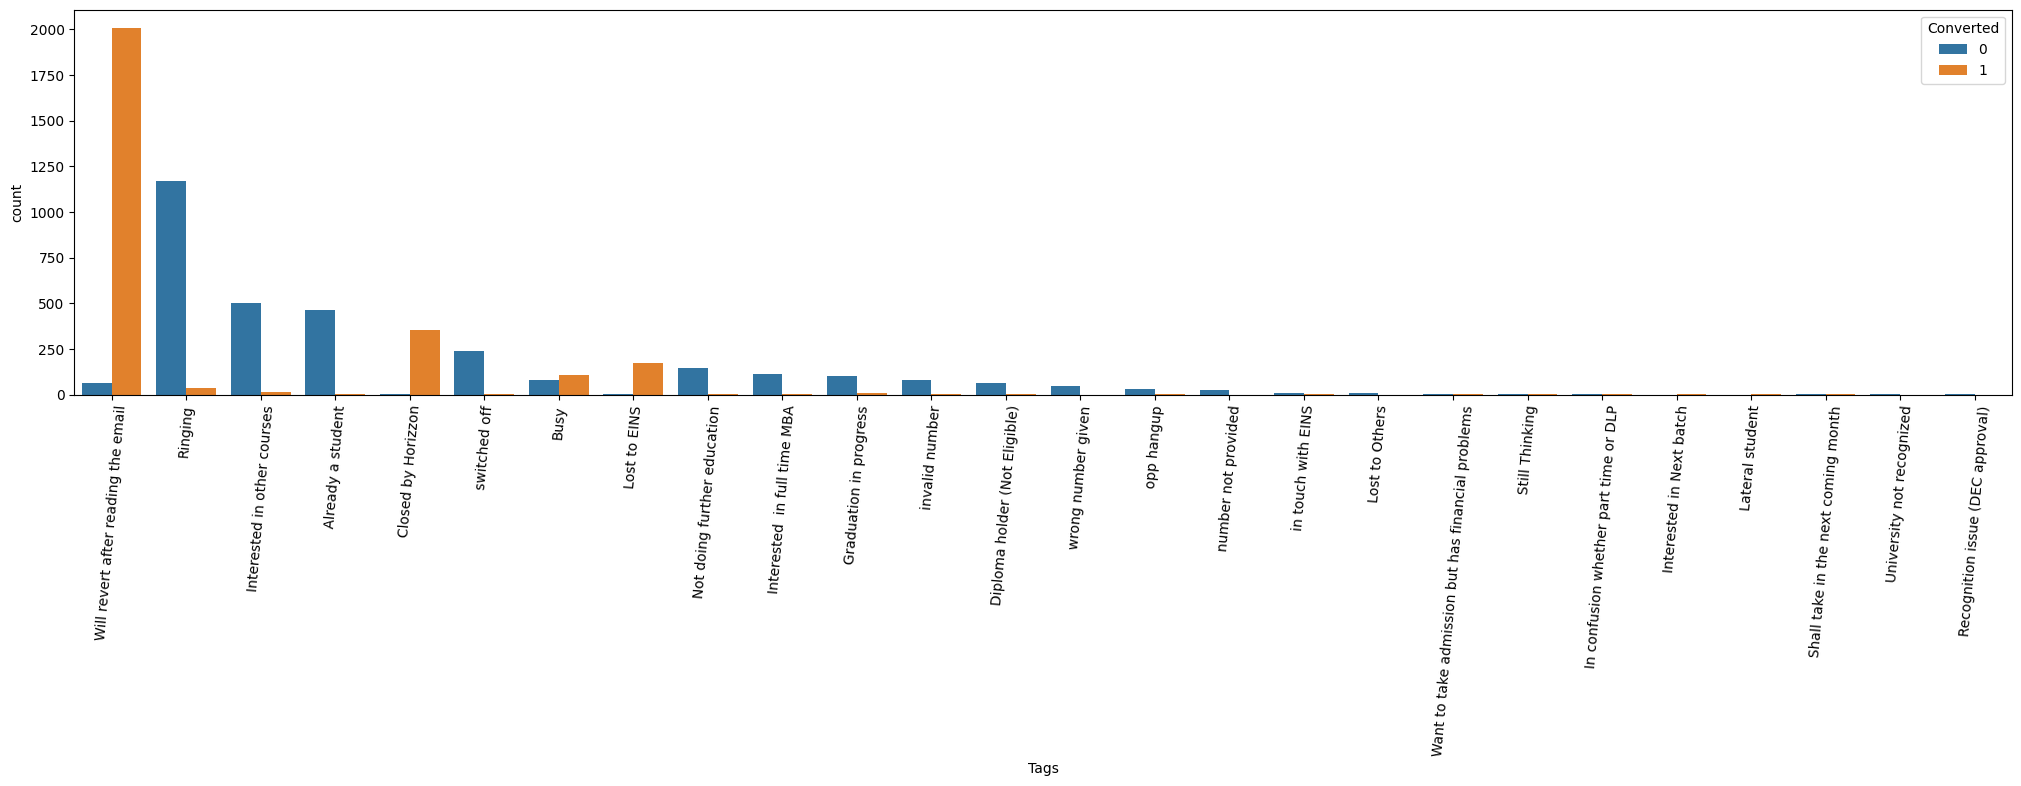

In [36]:
lead['Tags'].value_counts()

plt.figure(figsize=(25,5))
sns.countplot(data=lead, x='Tags', hue='Converted', order=lead['Tags'].value_counts().index)
plt.xticks(rotation=85)
plt.show()

There are too many Tag values with very less volume. merging them as "Others" makes sense. Tags with count less than 100 being merged as "others".

In [37]:
tags_count = lead['Tags'].value_counts().sort_values(ascending=False)
tags_replace = tags_count[tags_count<100].index
tags_replace

lead['Tags'] = lead['Tags'].replace(tags_replace, 'Others')

lead['Tags'].value_counts().sort_values(ascending=False)

Tags
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Others                                  302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: count, dtype: int64

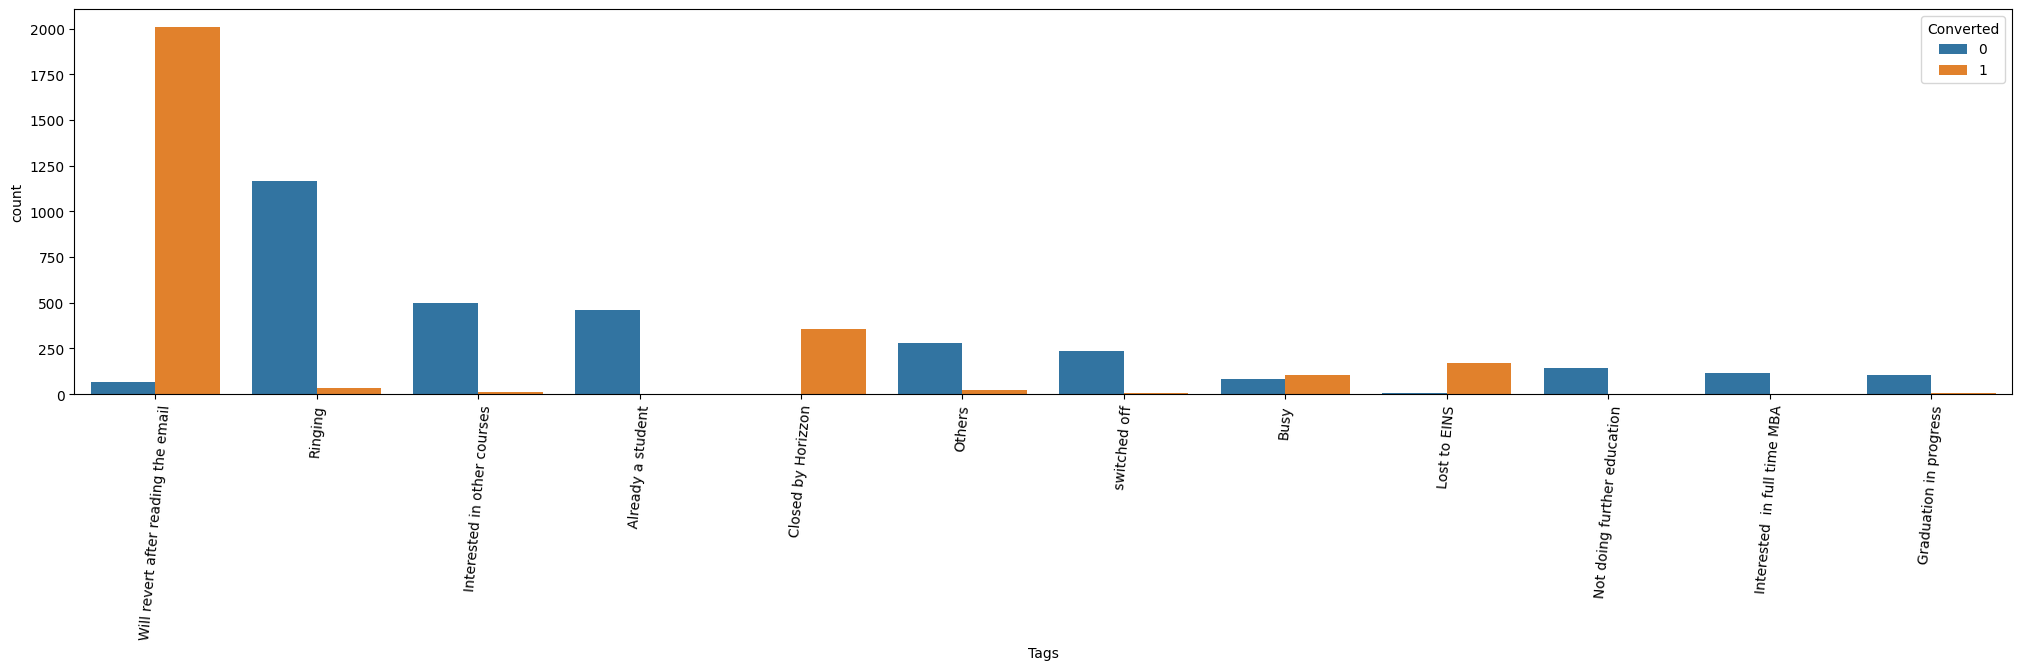

In [38]:
plt.figure(figsize=(25,5))
sns.countplot(data=lead, x='Tags', hue='Converted', order=lead['Tags'].value_counts().index)
plt.xticks(rotation=85)
plt.show()

**Tags with high success linkage:**

    1. Will revert after reading the email.
    2. Closed by Horizzon
    3. Lost to EINS

**Tags with Low success linkage:**

    1. Ringing
    2. Intersted in other courses
    2. Already a student
    3. Others
    4. Switched off
    5. Interested in Full time MBA
    6. Not doing further education.
    

Even though this column may look like it can bring out some reasonably good model, still the number of categories in it are too many to handle. 

For any statistical model application, this category would need to be simplified to fewer categories by clubbing similar categories together.

1. Ringing and Switched off are both possible to be merged as "Unreachable".
2. "Interested in Other courses" and "Interested in FUll time MBA " can be merged as "Interested in other courses".
3. "Already a student" and "Graduation in progress" can be merged as "Already a student"

In [39]:
lead['Tags'].isnull().sum()
# Null Count = 3353
# defining Nulls as "Unknown" as there is no merging logic seen.

lead['Tags'].fillna('Unknown', inplace=True)

In [40]:
lead['Tags'].value_counts().sort_values(ascending=False)

Tags
Unknown                                3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Others                                  302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: count, dtype: int64

In [41]:
lead['Tags']= lead['Tags'].replace(['Graduation in progress', 'Already a student'], 'Already a student')
lead['Tags']= lead['Tags'].replace(['Ringing', 'switched off'], 'Unreachable')
lead['Tags']= lead['Tags'].replace(['Interested in other courses', 'Interested  in full time MBA','Not doing further education'], 'Not interested in the course')

lead['Tags'].value_counts().sort_values(ascending=False)

Tags
Unknown                                3353
Will revert after reading the email    2072
Unreachable                            1443
Not interested in the course            775
Already a student                       576
Closed by Horizzon                      358
Others                                  302
Busy                                    186
Lost to EINS                            175
Name: count, dtype: int64

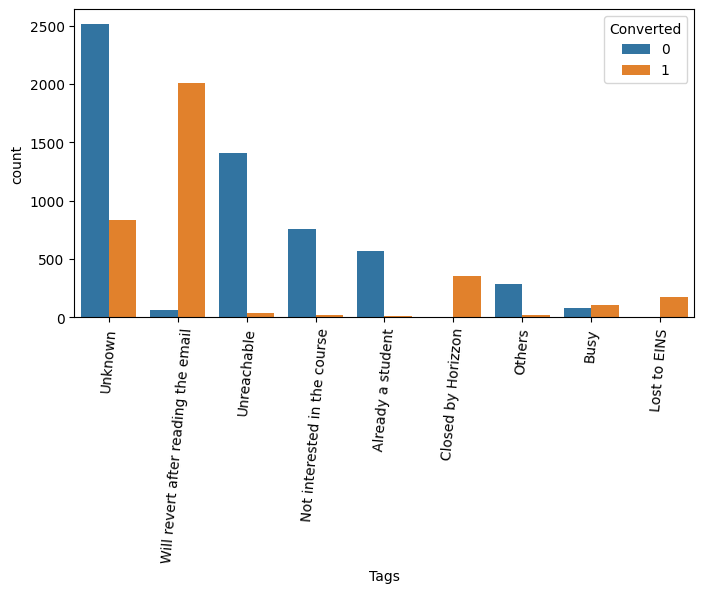

In [42]:
plt.figure(figsize=(8,4))
sns.countplot(data=lead, x='Tags', hue='Converted', order=lead['Tags'].value_counts().index)
plt.xticks(rotation=85)
plt.show()

**Clearly Contrasting values are now visible in this column which can be categorized also. Hence concluding the refinement on this column.**

In [43]:
lead['Through Recommendations'].value_counts()

# can be dropped as not relevant

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

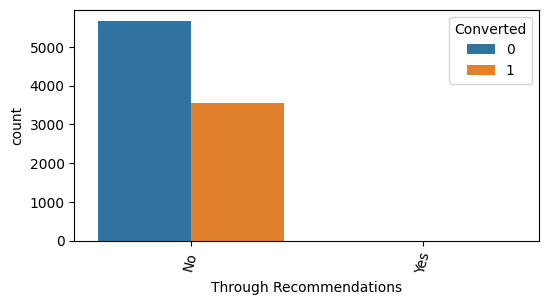

In [44]:
plt.figure(figsize=(6,3))
sns.countplot(data=lead, x='Through Recommendations', hue='Converted', order=lead['Through Recommendations'].value_counts().index)
plt.xticks(rotation=75)
plt.show()

In [45]:
# Dropping this column as it is insiginificant for model

lead = lead.drop(columns={'Through Recommendations'})

In [46]:
lead['TotalVisits'].isnull().sum()
# there are 137 Nulls in this column.Replacing Nulls with 0 as it is safe to assume the visit count is 0 for those leads. 

lead['TotalVisits'].fillna(0, inplace=True)

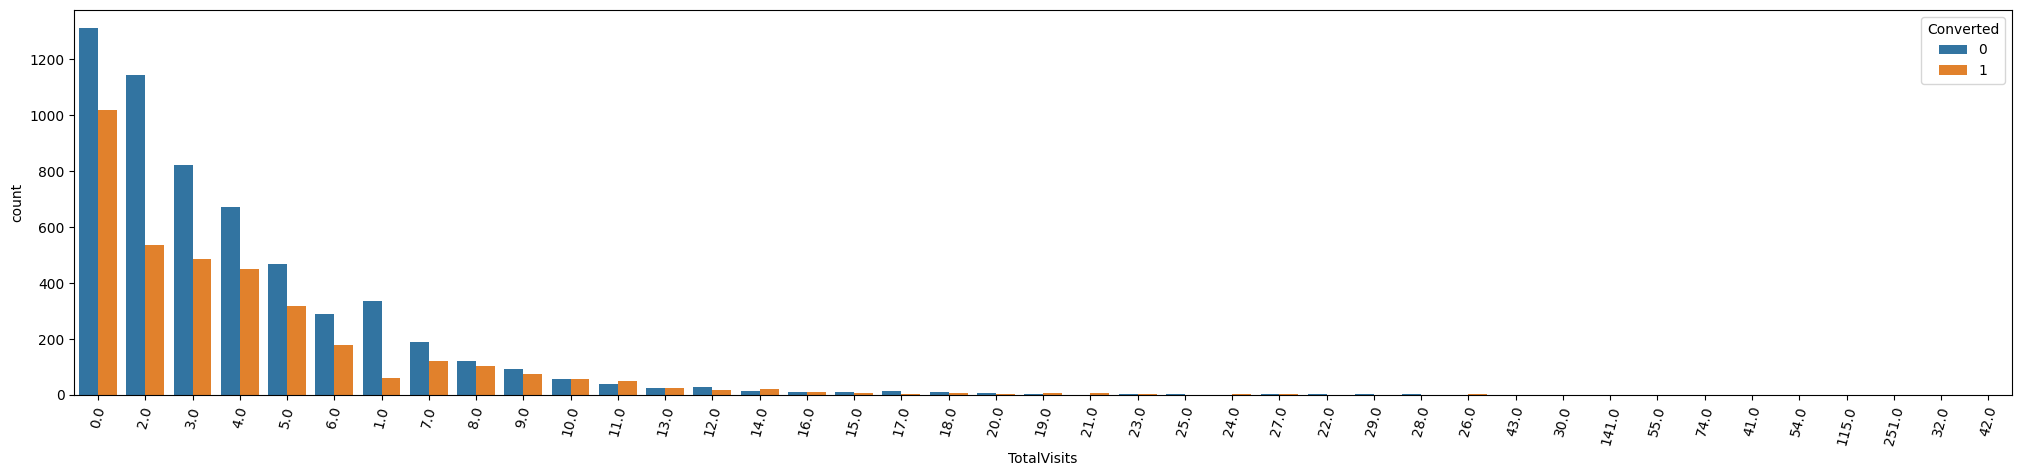

In [47]:
lead['TotalVisits'].value_counts()

plt.figure(figsize=(25,5))
sns.countplot(data=lead, x='TotalVisits', hue='Converted', order=lead['TotalVisits'].value_counts().index)
plt.xticks(rotation=75)
plt.show()

In [48]:
lead['TotalVisits'].quantile([0.25,0.5,0.75])

0.25    0.0
0.50    3.0
0.75    5.0
Name: TotalVisits, dtype: float64

# Need to decide which method of Outlier removal has to be followed. 
- Approach 1 : Using data visualization - 15.0 looks like a reasonable limit for Total Visits.
- Approach 2 : Using IQR methodology. 


First tryiing Approach 1 

In [49]:
lead[lead['TotalVisits']>15]['TotalVisits'].count()

np.int64(120)

In [50]:
lead= lead[lead['TotalVisits']<=15]

In [51]:
lead['TotalVisits'].value_counts()

TotalVisits
0.0     2326
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
13.0      48
12.0      45
14.0      36
15.0      18
Name: count, dtype: int64

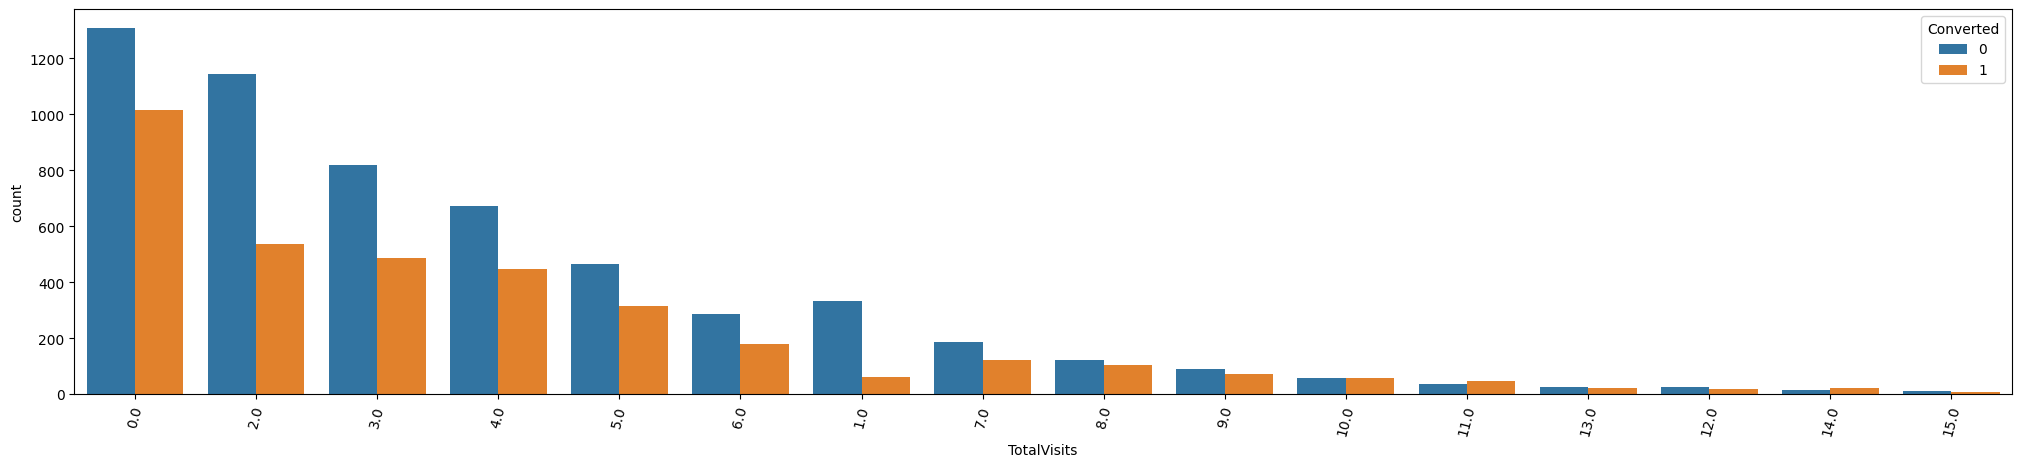

In [52]:
lead['TotalVisits'].value_counts()

plt.figure(figsize=(25,5))
sns.countplot(data=lead, x='TotalVisits', hue='Converted', order=lead['TotalVisits'].value_counts().index)
plt.xticks(rotation=75)
plt.show()

Observations : 
1. Most of calls - Successful or not - get maximum of 10 days visit at max (rest can easily be considered outliers - will calculate separately in next code piece). 
2. Surprisingly, there is a big number of calls with 0 online visits and have a healthy success ratio as well.


Next: a) make boxplot and calculate the outliers for visits.
      b) calculate ratio of lead success to check if a visit band is more effective for high success. Accordingly , visits could be clustered in range for modelling. (not done since boxplot does not show any pattern)


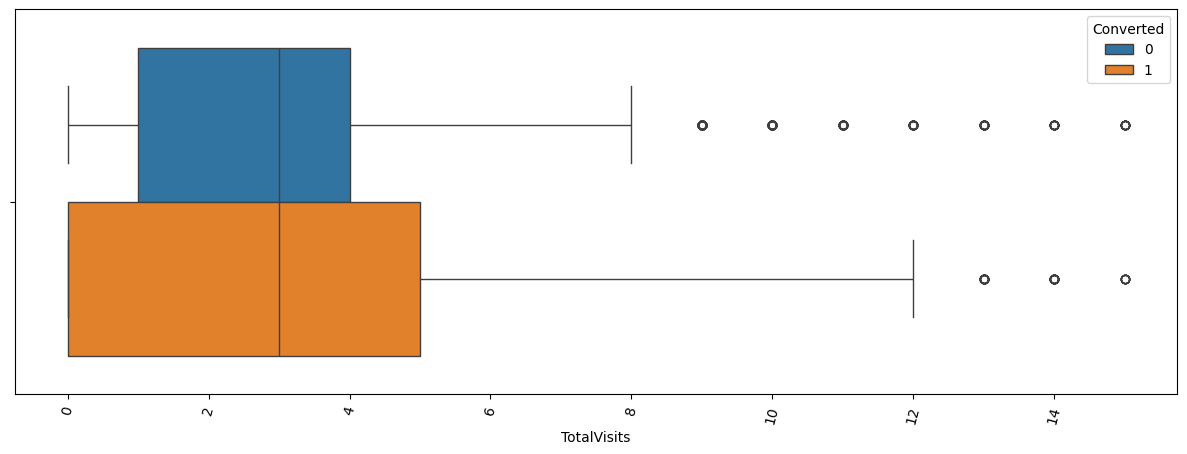

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(data=lead, x='TotalVisits', hue='Converted')
plt.xticks(rotation=75)
plt.show()

***Box plot shows that "TOTAL VISITS" makes no Noteable difference in the decision making of leads. Hence, may not be important. but will put through further tests in later stage to validate.***

In [54]:
lead['Total Time Spent on Website'].isnull().sum()

np.int64(0)

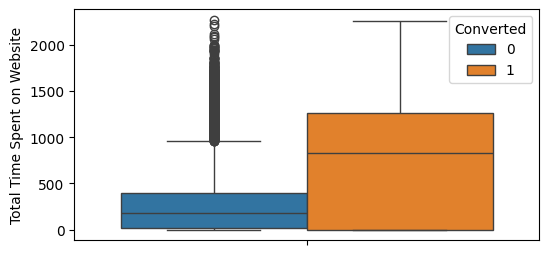

In [55]:
lead['Total Time Spent on Website'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6,3))
sns.boxplot(data=lead, y='Total Time Spent on Website' , hue='Converted'  )
# sns.boxplot(x=lead.Converted, y=lead['Total Time Spent on Website'])
plt.show()

The above Box plot shows that leads that spend more time on Website are most likely to convert to Sales. Important 

In [56]:
lead['What is your current occupation'].isnull().sum()
# *100/lead.shape[0]

np.int64(2663)

In [57]:
lead['What is your current occupation'].value_counts().sort_values(ascending=False)

What is your current occupation
Unemployed              5520
Working Professional     697
Student                  208
Other                     14
Housewife                 10
Businessman                8
Name: count, dtype: int64

There is a significant amount of Null in this column that needs handling. Replacing Nulls with "Unemployed" as this consists nearly 70% of the overall Leads population. 

In [58]:
lead['What is your current occupation'].fillna('Unemployed', inplace=True)

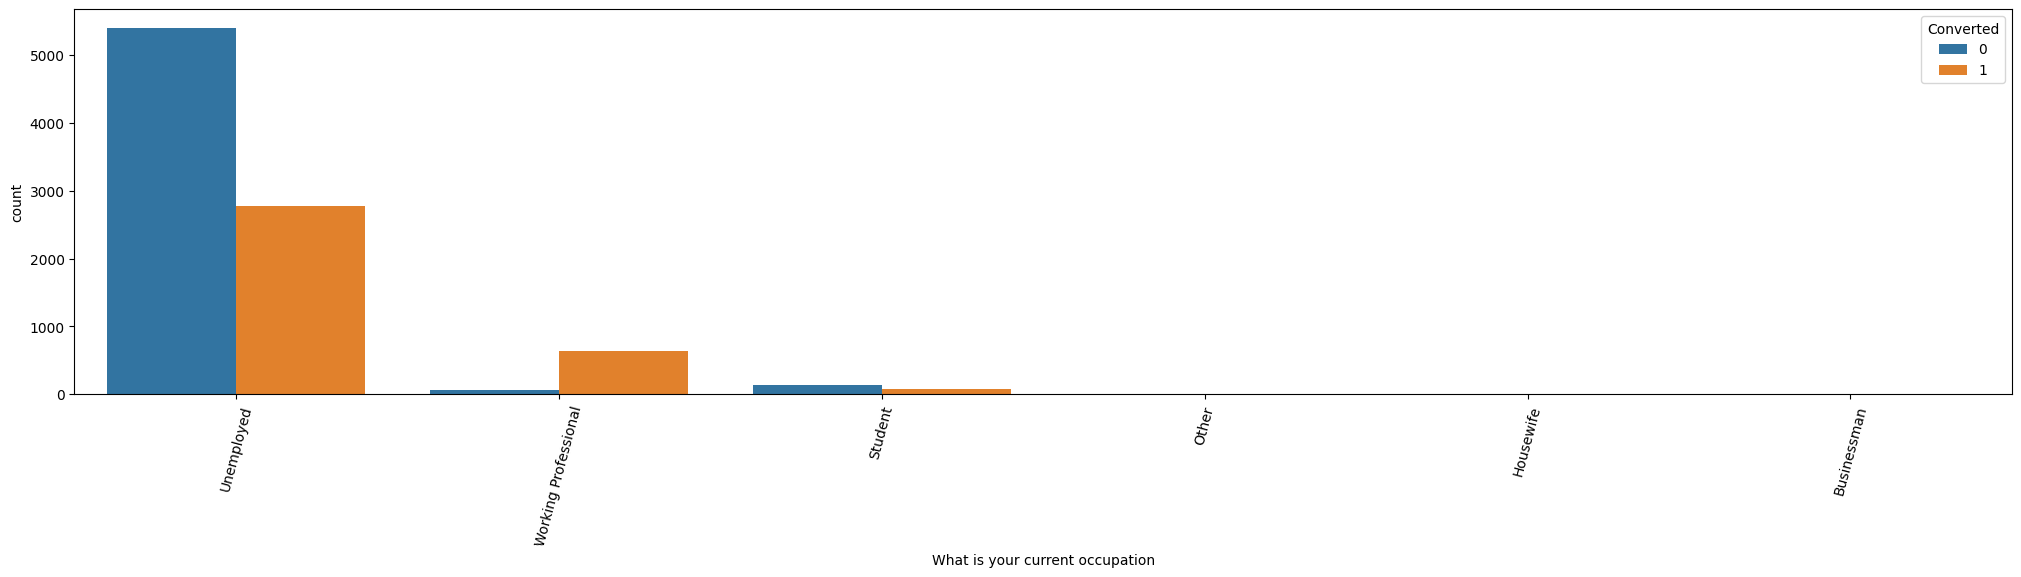

In [59]:
lead['What is your current occupation'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(25,5))
sns.countplot(data=lead, x='What is your current occupation', hue='Converted', order=lead['What is your current occupation'].value_counts().index)
plt.xticks(rotation=75)
plt.show()


Shows some clear categorical data. passing it for model after merging the miniscule categories such as Other, housewife, Businessman in same bucket as "others"

In [60]:
lead['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              8183
Working Professional     697
Student                  208
Other                     14
Housewife                 10
Businessman                8
Name: count, dtype: int64

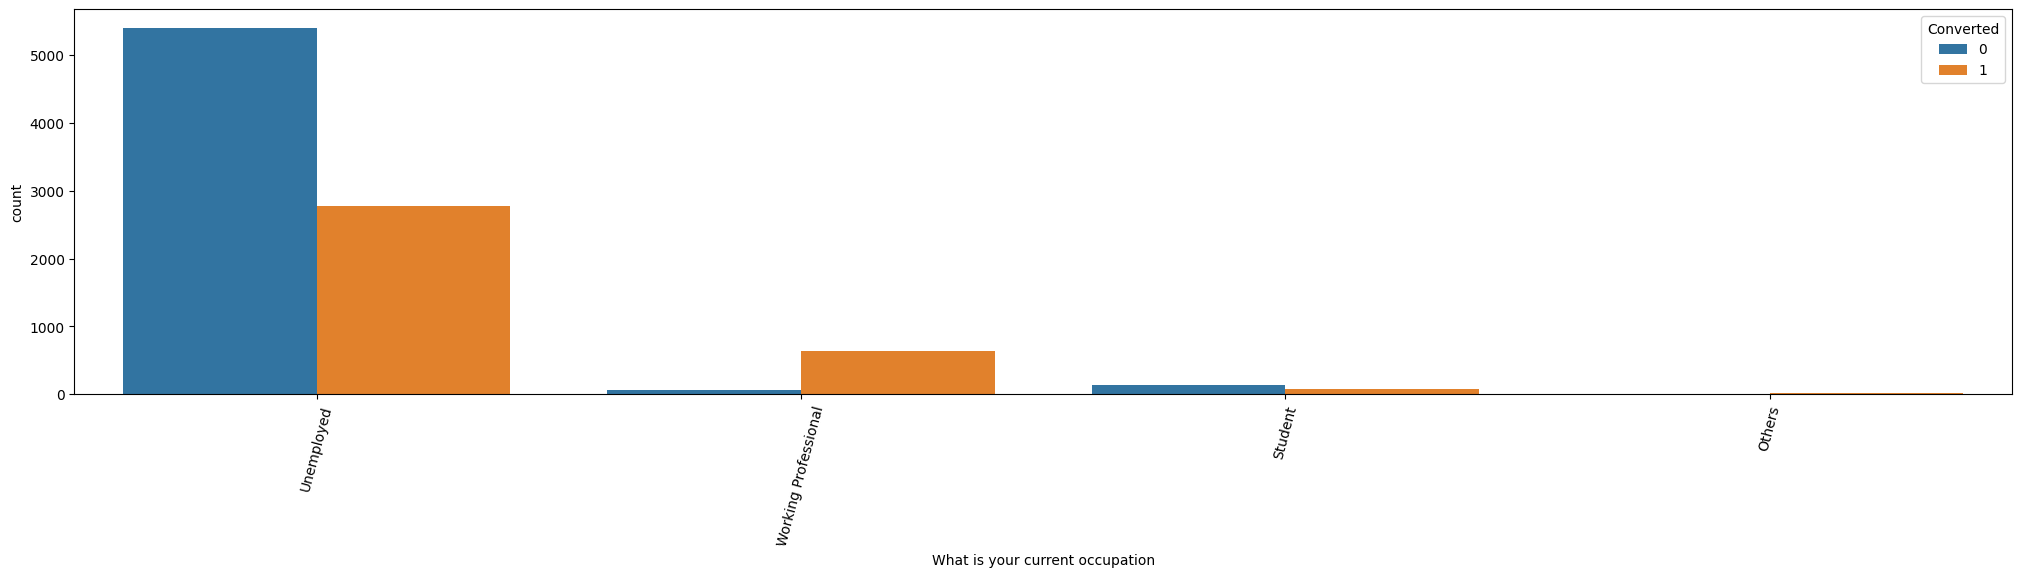

In [61]:
lead['What is your current occupation'] =lead['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')

lead['What is your current occupation'].value_counts()

plt.figure(figsize=(25,5))
sns.countplot(data=lead, x='What is your current occupation', hue='Converted', order=lead['What is your current occupation'].value_counts().index)
plt.xticks(rotation=75)
plt.show()

The column "What is your current occupation" seems reasonably a good categorical column now with useful values.

In [62]:
lead['Last Activity'].isnull().sum()

# only 103 Nulls. can either be removed from data or replaced with the Mode. lets check for the value count

np.int64(103)

In [63]:
lead['Last Activity'].value_counts().sort_values(ascending=False)

# No category is dominantly big enough. however, there are so many categories with miniscule numbers. 
# this can probably be merged with them as "others" in later stage. 

Last Activity
Email Opened                    3406
SMS Sent                        2726
Olark Chat Conversation          969
Page Visited on Website          583
Converted to Lead                428
Email Bounced                    325
Email Link Clicked               265
Form Submitted on Website        113
Unreachable                       92
Unsubscribed                      61
Had a Phone Conversation          29
Approached upfront                 9
View in browser link Clicked       5
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: count, dtype: int64

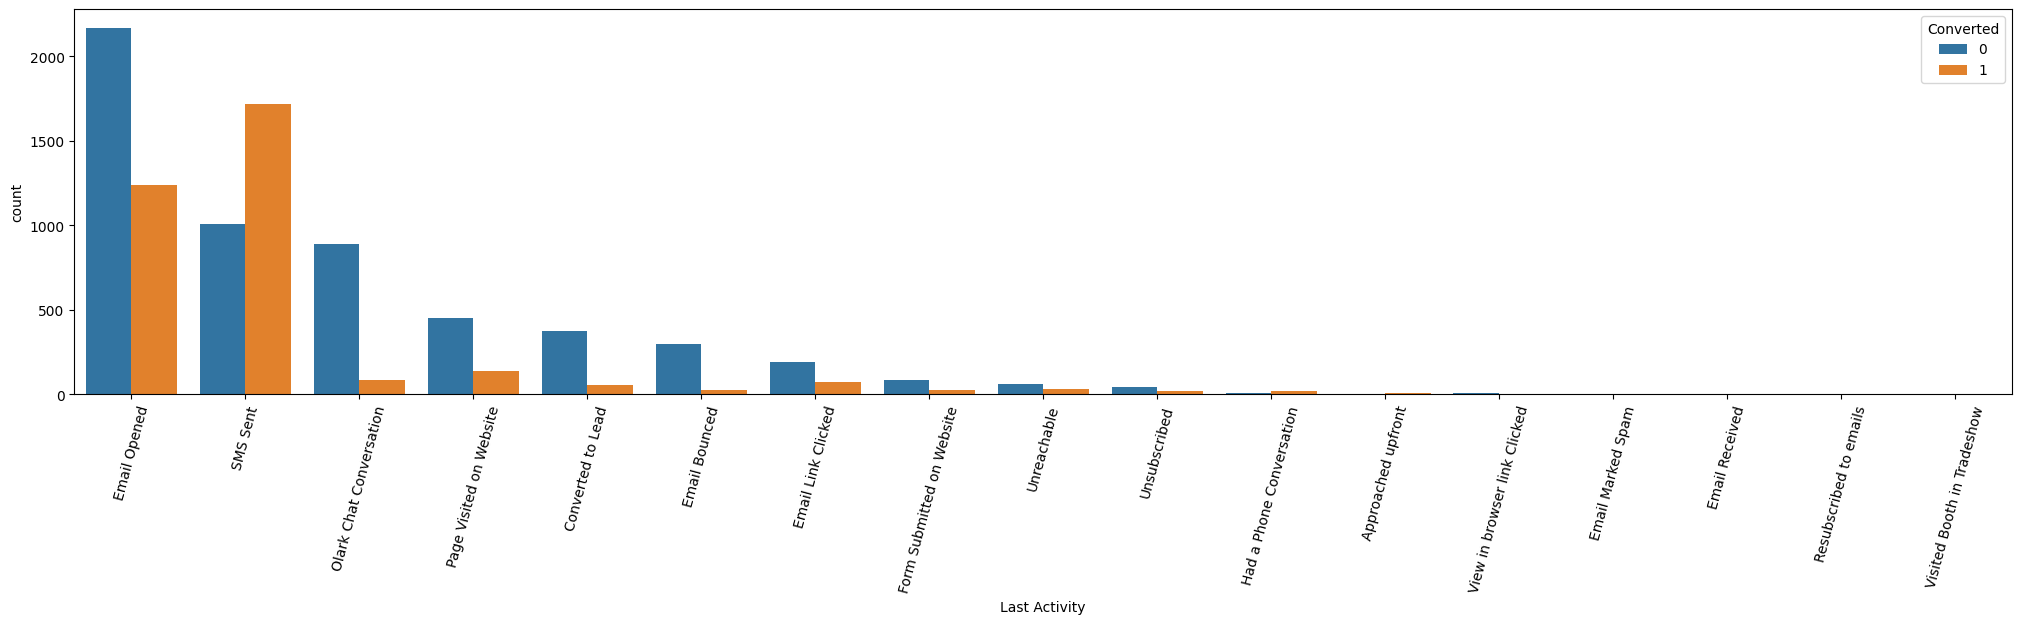

In [64]:
lead['Last Activity'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(25,5))
sns.countplot(data=lead, x='Last Activity', hue='Converted', order=lead['Last Activity'].value_counts().index)
plt.xticks(rotation=75)
plt.show()


In [65]:
last_activity = lead['Last Activity'].value_counts().sort_values(ascending=False)
filtered_last_activity = last_activity[last_activity<100].index
filtered_last_activity

Index(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation',
       'Approached upfront', 'View in browser link Clicked',
       'Email Marked Spam', 'Email Received', 'Resubscribed to emails',
       'Visited Booth in Tradeshow'],
      dtype='object', name='Last Activity')

In [66]:
lead['Last Activity']= lead['Last Activity'].replace(filtered_last_activity, 'others')
lead['Last Activity'].fillna('others', inplace=True)

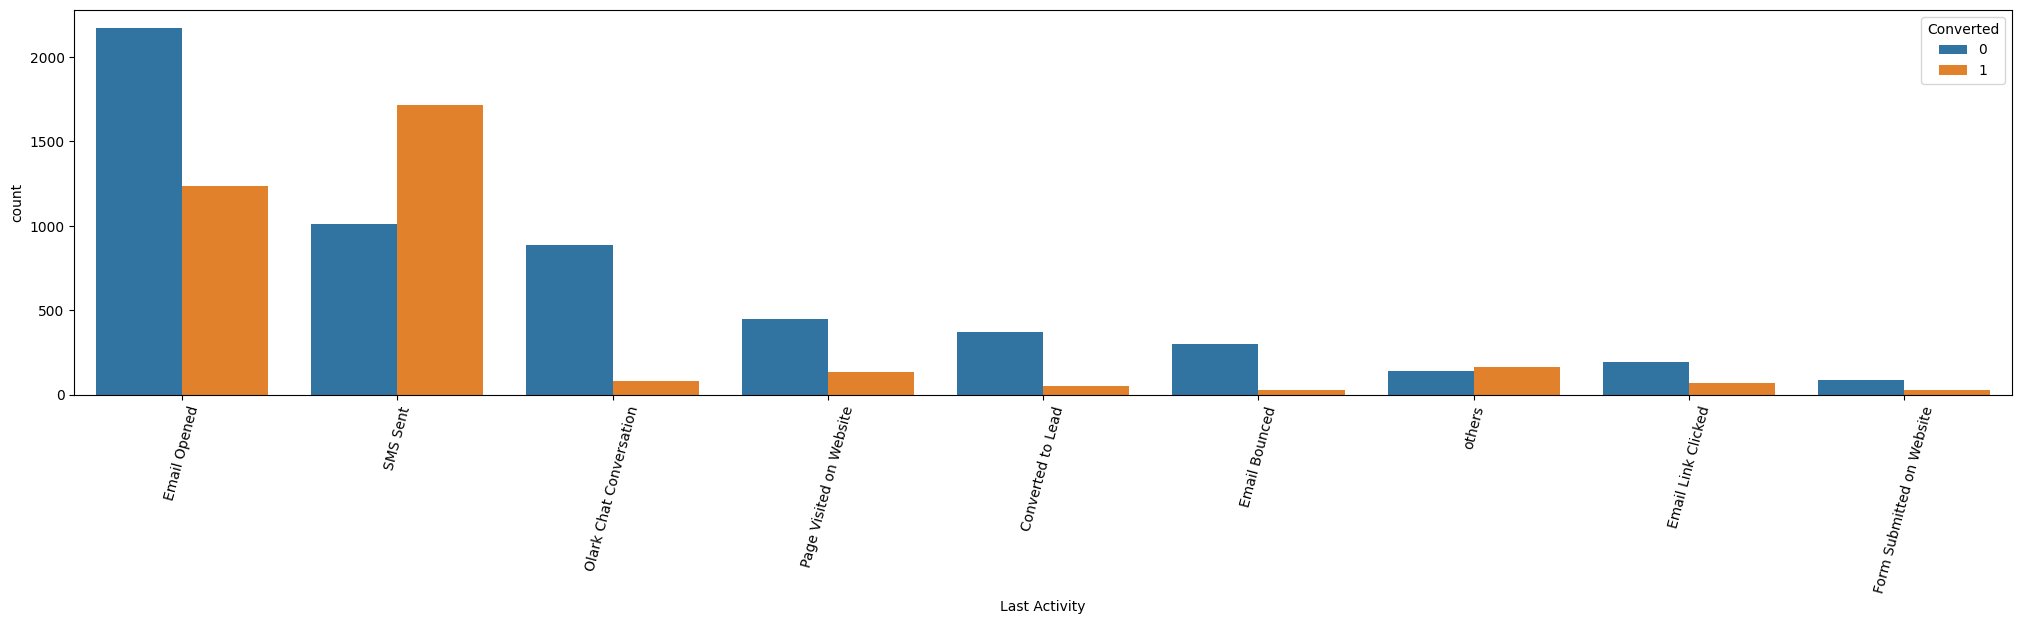

In [67]:
lead['Last Activity'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(25,5))
sns.countplot(data=lead, x='Last Activity', hue='Converted', order=lead['Last Activity'].value_counts().index)
plt.xticks(rotation=75)
plt.show()

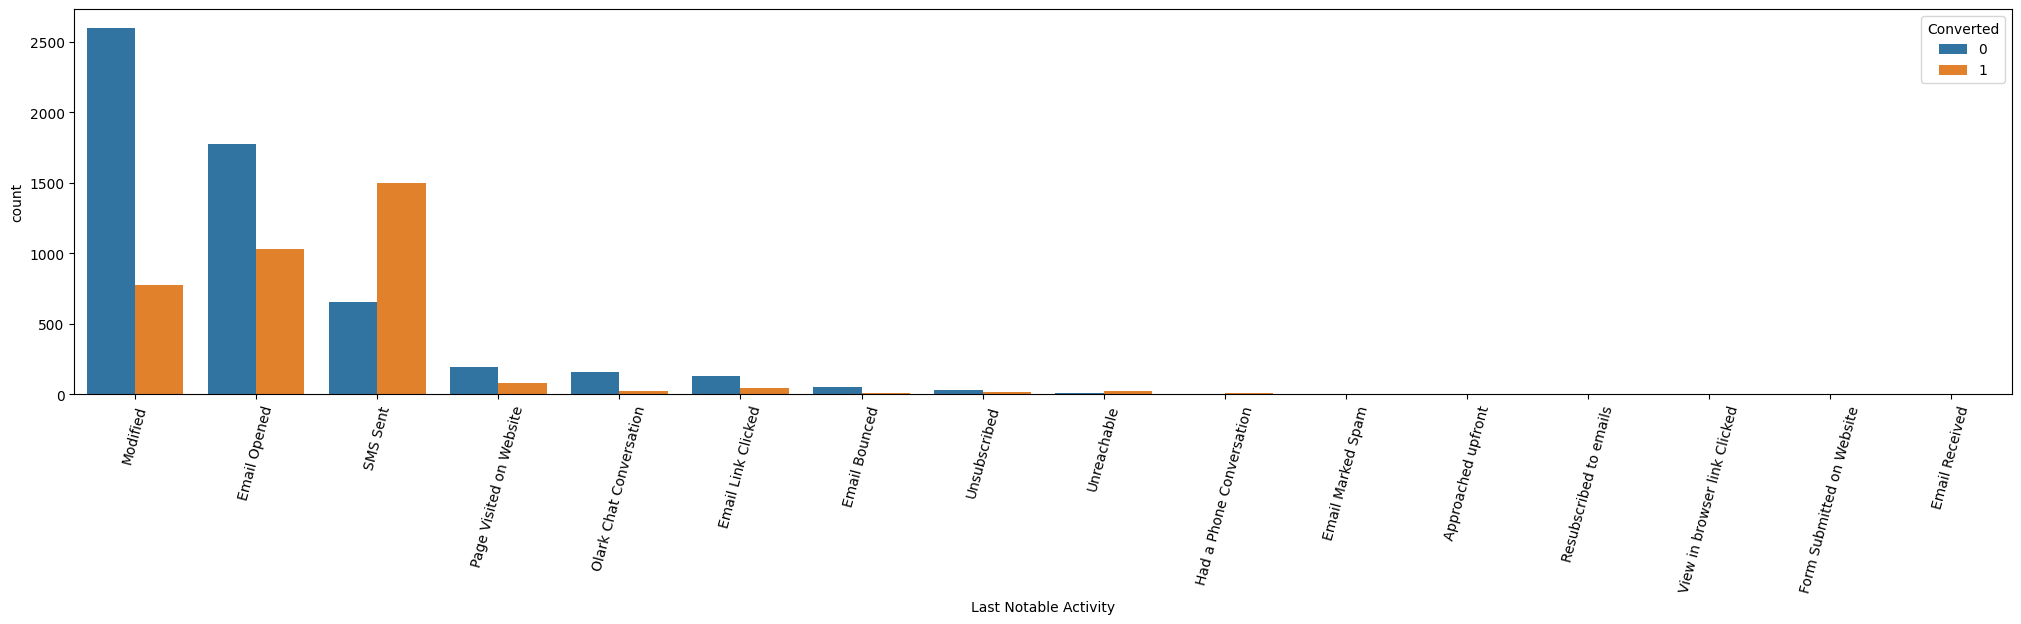

In [68]:
lead['Last Notable Activity'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(25,5))
sns.countplot(data=lead, x='Last Notable Activity', hue='Converted', order=lead['Last Notable Activity'].value_counts().index)
plt.xticks(rotation=75)
plt.show()

In [69]:
last_notable_activity = lead['Last Notable Activity'].value_counts().sort_values(ascending=False)
filtered_lastnotable_activity = last_notable_activity[last_notable_activity<100].index
filtered_lastnotable_activity

lead['Last Notable Activity'] =lead['Last Notable Activity'].replace(filtered_lastnotable_activity, 'others')

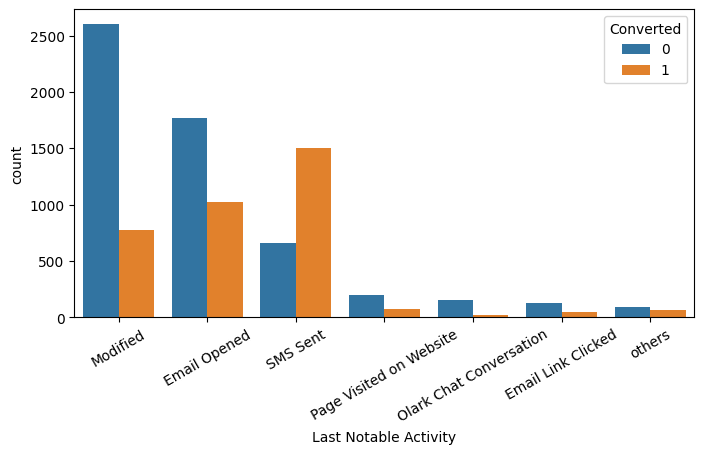

In [133]:
plt.figure(figsize=(8,4))
sns.countplot(data=lead, x='Last Notable Activity', hue='Converted', order=lead['Last Notable Activity'].value_counts().index)
plt.xticks(rotation=30)
plt.show()



In [71]:
lead['Lead Source'].isnull().sum()
# About 36 Nulls in this column which could be handled in multiple ways, lets check more and decide later

np.int64(36)

In [72]:
lead['Lead Source'].value_counts().sort_values(ascending=False)

Lead Source
Google               2844
Direct Traffic       2497
Olark Chat           1750
Organic Search       1115
Reference             532
Welingak Website      142
Referral Sites        121
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

Observations : 
- Google and google are same.. can be merged.
- "Facebook", "youtubechannel", "Social Media" are some pretty common Social media platforms .. can be merged. 
- All other categories can be merged as "Others" . Nulls can also be merged into "Others"

In [73]:
lead['Lead Source'] = lead['Lead Source'].replace(['Google','google'],'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['Facebook','Social Media','youtubechannel'],'Social Media')
lead['Lead Source'].fillna('Others', inplace=True)

lead['Lead Source'].value_counts().sort_values(ascending=False)

Lead Source
Google               2849
Direct Traffic       2497
Olark Chat           1750
Organic Search       1115
Reference             532
Welingak Website      142
Referral Sites        121
Social Media           58
Others                 36
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [74]:
# Merging all categories with count <50 as Others
lead_scores = lead['Lead Source'].value_counts().sort_values(ascending=False)
filtered_lead_scores = lead_scores[lead_scores<50].index

lead['Lead Source'] = lead['Lead Source'].replace(filtered_lead_scores, "Others")
lead['Lead Source'].value_counts().sort_values(ascending=False)



Lead Source
Google              2849
Direct Traffic      2497
Olark Chat          1750
Organic Search      1115
Reference            532
Welingak Website     142
Referral Sites       121
Social Media          58
Others                56
Name: count, dtype: int64

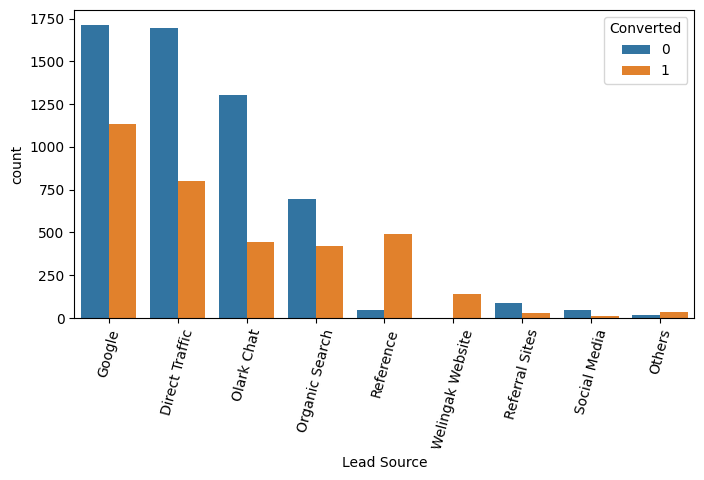

In [131]:
plt.figure(figsize=(8,4))
sns.countplot(data=lead, x='Lead Source', hue='Converted', order=lead['Lead Source'].value_counts().index)
plt.xticks(rotation=75)
plt.show()

"Lead Source" is now a reasonably healthy column without nulls, with limited meaningful categories that can be handled nicely in model. 

In [76]:
lead['Lead Origin'].isnull().sum()

# No Nulls

np.int64(0)

In [77]:
lead['Lead Origin'].value_counts().sort_values(ascending=False)

Lead Origin
Landing Page Submission    4796
API                        3552
Lead Add Form               716
Others                       56
Name: count, dtype: int64

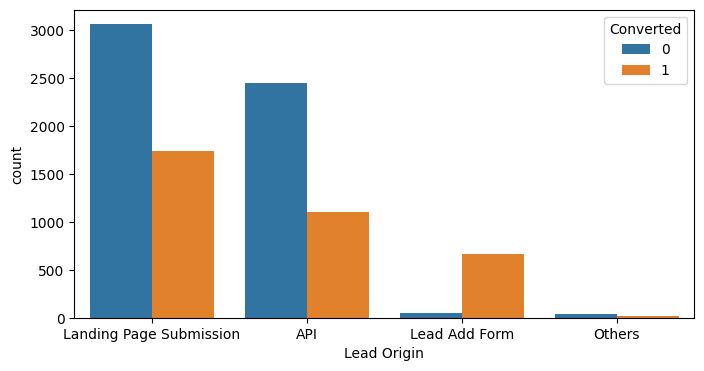

In [129]:
#  a Pretty Neat column with no Nulls and limited categories. Plotting to see its behavior viz "Converted"
plt.figure(figsize=(8,4))
sns.countplot(data=lead, x='Lead Origin', hue='Converted', order=lead['Lead Origin'].value_counts().index)
plt.xticks(rotation=00)
plt.show()


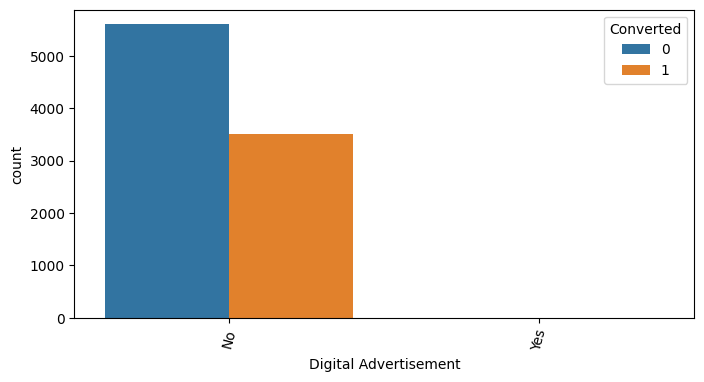

In [79]:
lead['Digital Advertisement'].value_counts()
plt.figure(figsize=(8,4))
sns.countplot(data=lead, x='Digital Advertisement', hue='Converted', order=lead['Digital Advertisement'].value_counts().index)
plt.xticks(rotation=75)
plt.show()



In [80]:
# Data is biased and brings no value. dropping column

lead = lead.drop(columns={'Digital Advertisement'})


In [81]:
lead['I agree to pay the amount through cheque'].value_counts()

lead = lead.drop(columns={'I agree to pay the amount through cheque'})
# Since data is totally biased, dropping this column

In [82]:
lead['Newspaper'].value_counts()
# Since data is totally biased, dropping this column

Newspaper
No     9119
Yes       1
Name: count, dtype: int64

In [83]:
lead['Newspaper Article'].value_counts()
# Since data is totally biased, dropping this column

Newspaper Article
No     9119
Yes       1
Name: count, dtype: int64

In [84]:
lead['Magazine'].value_counts()

lead = lead.drop(columns={'Magazine', 'Newspaper','Newspaper Article'})
# Since data is totally biased, dropping this column

In [85]:
lead['Receive More Updates About Our Courses'].value_counts()
# Since data is totally biased, dropping this column
lead = lead.drop(columns={'Receive More Updates About Our Courses'})

In [86]:
lead['Search'].value_counts()
# Since data is totally biased, dropping this column
lead = lead.drop(columns={'Search'})

In [87]:
lead['Update me on Supply Chain Content'].value_counts()
# Since data is totally biased, dropping this column
lead = lead.drop(columns={'Update me on Supply Chain Content'})

In [88]:
lead['X Education Forums'].value_counts()
# Since data is totally biased, dropping this column
lead = lead.drop(columns={'X Education Forums'})

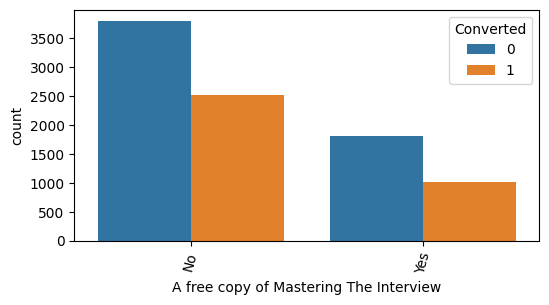

In [128]:
lead['A free copy of Mastering The Interview'].value_counts()

plt.figure(figsize=(6,3))
sns.countplot(data=lead, x='A free copy of Mastering The Interview', hue='Converted', order=lead['A free copy of Mastering The Interview'].value_counts().index)
plt.xticks(rotation=75)
plt.show()
# since both categories have some significant value for it , keeping it in model.

In [90]:
lead['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6436
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [91]:
lead['What matters most to you in choosing a course'].isnull().sum()

# 2709 Nulls are available. FIlling with the Mode value (Better Career Prospects) could be an option but afterwards also, the data would be extremely biased on one category.
# Dropping this column for that reason.


lead = lead.drop(columns={'What matters most to you in choosing a course'})


In [92]:
lead['Page Views Per Visit'].isnull().sum()
# replacing Nulls with 0 as it is safe to assume null = no visit (0)

lead['Page Views Per Visit'].fillna(0, inplace=True)

In [93]:
lead['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00     2326
2.00     1791
3.00     1193
4.00      890
1.00      651
5.00      516
1.50      305
6.00      241
2.50      239
7.00      133
3.50       90
8.00       83
1.33       66
1.67       60
2.33       59
2.67       51
9.00       45
4.50       40
1.75       28
3.33       27
10.00      23
1.25       23
5.50       20
11.00      18
2.25       18
3.67       16
1.80       13
6.50       13
2.75       12
1.40       11
2.80        9
2.20        9
14.00       9
4.33        9
1.60        8
3.25        8
2.17        7
2.40        6
13.00       5
12.00       5
1.20        5
1.71        4
1.83        4
2.60        4
15.00       4
1.43        4
1.57        3
1.38        2
1.56        2
7.50        2
3.75        2
1.22        2
1.27        1
1.86        1
1.14        1
2.14        1
1.63        1
1.17        1
Name: count, dtype: int64

In [94]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9120 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9120 non-null   object 
 1   Lead Source                             9120 non-null   object 
 2   Do Not Email                            9120 non-null   object 
 3   Converted                               9120 non-null   int64  
 4   TotalVisits                             9120 non-null   float64
 5   Total Time Spent on Website             9120 non-null   int64  
 6   Page Views Per Visit                    9120 non-null   float64
 7   Last Activity                           9120 non-null   object 
 8   Specialization                          9120 non-null   object 
 9   What is your current occupation         9120 non-null   object 
 10  Tags                                    9120 non-null   object 
 

The data seems fairly clean as there are no Nulls, categorization of data is taken care as much as possible, and unwanted or useless columns are also removed. 

The data seems fit for modelling now. 

Count of X (independant variable features ) : 11
Count of Dependant feature (Converted) : 1

We will now try to convert the object data to Numeric (getdummies) and review the situation about concluding EDA or check if further data refinement is needed.

In [95]:
lead.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  Unknown   
1             Email Opened                  Unknown   
2             Email Opened  Business Administration   
3                   others    Media and Advertising   
4        Converted to Lead                  Unknown   

  What is your current occupation                                 Tags  \
0                      Unemployed         Not interested in the course   
1                      Unemployed                          Unreachable   
2                         Student  Will revert after reading the email   
3                      Unemployed                          Unreachable   
4                      Unemployed  Will revert after reading the email   

      City A free copy of Mastering The Interview Last Notable Activity  
0  Unknown                                     No              Modified  
1  Unknown                                     No          Email Opened  
2    Metro                                    Yes          Email Opened  
3    Metro                                     No              Modified  
4    Metro                                     No              Modified

# Model Building Process

**Beginning the model building from here onwards

Points to remember before beginning : 

- Based on Geometric Intuition : in Logistic regression, the data should be almost linearly separaable. 
- Basic task of logistic regression is to find a separable plan that can classify the data . In this case - Hot Leads and Cold leads. 
    - in this case - we may have to find a critical value of Lead score above which the rate of conversion success matches the actual conversion with high accuracy (Presently, this is just an assumption - to be checked as we move ahead)
    - Means: we have to find a value such that Σ (yi * wT*xi) is maximized  .. if this is correctly found - model would be good. 
- Distance between the points are most important factor in logistic regression. 
- The points should be linear in nature.


<img src="image-1.png" alt="alt text" style="width:50%;"/>


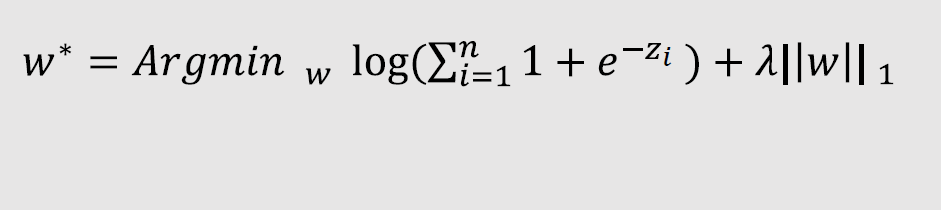

In [96]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9120 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9120 non-null   object 
 1   Lead Source                             9120 non-null   object 
 2   Do Not Email                            9120 non-null   object 
 3   Converted                               9120 non-null   int64  
 4   TotalVisits                             9120 non-null   float64
 5   Total Time Spent on Website             9120 non-null   int64  
 6   Page Views Per Visit                    9120 non-null   float64
 7   Last Activity                           9120 non-null   object 
 8   Specialization                          9120 non-null   object 
 9   What is your current occupation         9120 non-null   object 
 10  Tags                                    9120 non-null   object 
 

In [97]:
# Splitting the data to prepare for further steps

lead_obj = lead.select_dtypes('object')
lead_num = lead.select_dtypes(['int', 'float'])
lead_num = lead_num.drop(columns={'Converted'})
lead_output = lead['Converted']

In [98]:
# Checking data types to confirm that next steps do not get messed up

lead_num.info() # All Good - All int and float. 


<class 'pandas.core.frame.DataFrame'>
Index: 9120 entries, 0 to 9239
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TotalVisits                  9120 non-null   float64
 1   Total Time Spent on Website  9120 non-null   int64  
 2   Page Views Per Visit         9120 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 285.0 KB


In [99]:
lead_output.info() #Int only.. no need to do anything. proceed ahead. 

<class 'pandas.core.series.Series'>
Index: 9120 entries, 0 to 9239
Series name: Converted
Non-Null Count  Dtype
--------------  -----
9120 non-null   int64
dtypes: int64(1)
memory usage: 142.5 KB


In [100]:
# Apply One-hot Encoding on Object features . 

lead_dummy = pd.get_dummies(lead_obj, drop_first=True).astype(int)

lead_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9120 entries, 0 to 9239
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Lead Origin_Landing Page Submission                   9120 non-null   int64
 1   Lead Origin_Lead Add Form                             9120 non-null   int64
 2   Lead Origin_Others                                    9120 non-null   int64
 3   Lead Source_Google                                    9120 non-null   int64
 4   Lead Source_Olark Chat                                9120 non-null   int64
 5   Lead Source_Organic Search                            9120 non-null   int64
 6   Lead Source_Others                                    9120 non-null   int64
 7   Lead Source_Reference                                 9120 non-null   int64
 8   Lead Source_Referral Sites                            9120 non-null   int64
 9   Le

 A total of 49 columns generated. all are proper int columns . no issues so far. 

In [101]:
#  Merging dummies with num columns (off-course without "Converted" now)

final_x = pd.concat([lead_num, lead_dummy], axis=1)

final_x.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9120 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           9120 non-null   float64
 1   Total Time Spent on Website                           9120 non-null   int64  
 2   Page Views Per Visit                                  9120 non-null   float64
 3   Lead Origin_Landing Page Submission                   9120 non-null   int64  
 4   Lead Origin_Lead Add Form                             9120 non-null   int64  
 5   Lead Origin_Others                                    9120 non-null   int64  
 6   Lead Source_Google                                    9120 non-null   int64  
 7   Lead Source_Olark Chat                                9120 non-null   int64  
 8   Lead Source_Organic Search                            9120 non-

The dataset is now ready for modelling. However, we still need to check if there is any sort of multi-collinearity among the independant variables. if so , such columns need to be identified and some of those would be removed upon need basis. 

In [102]:
correlation_matrix = final_x.corr()

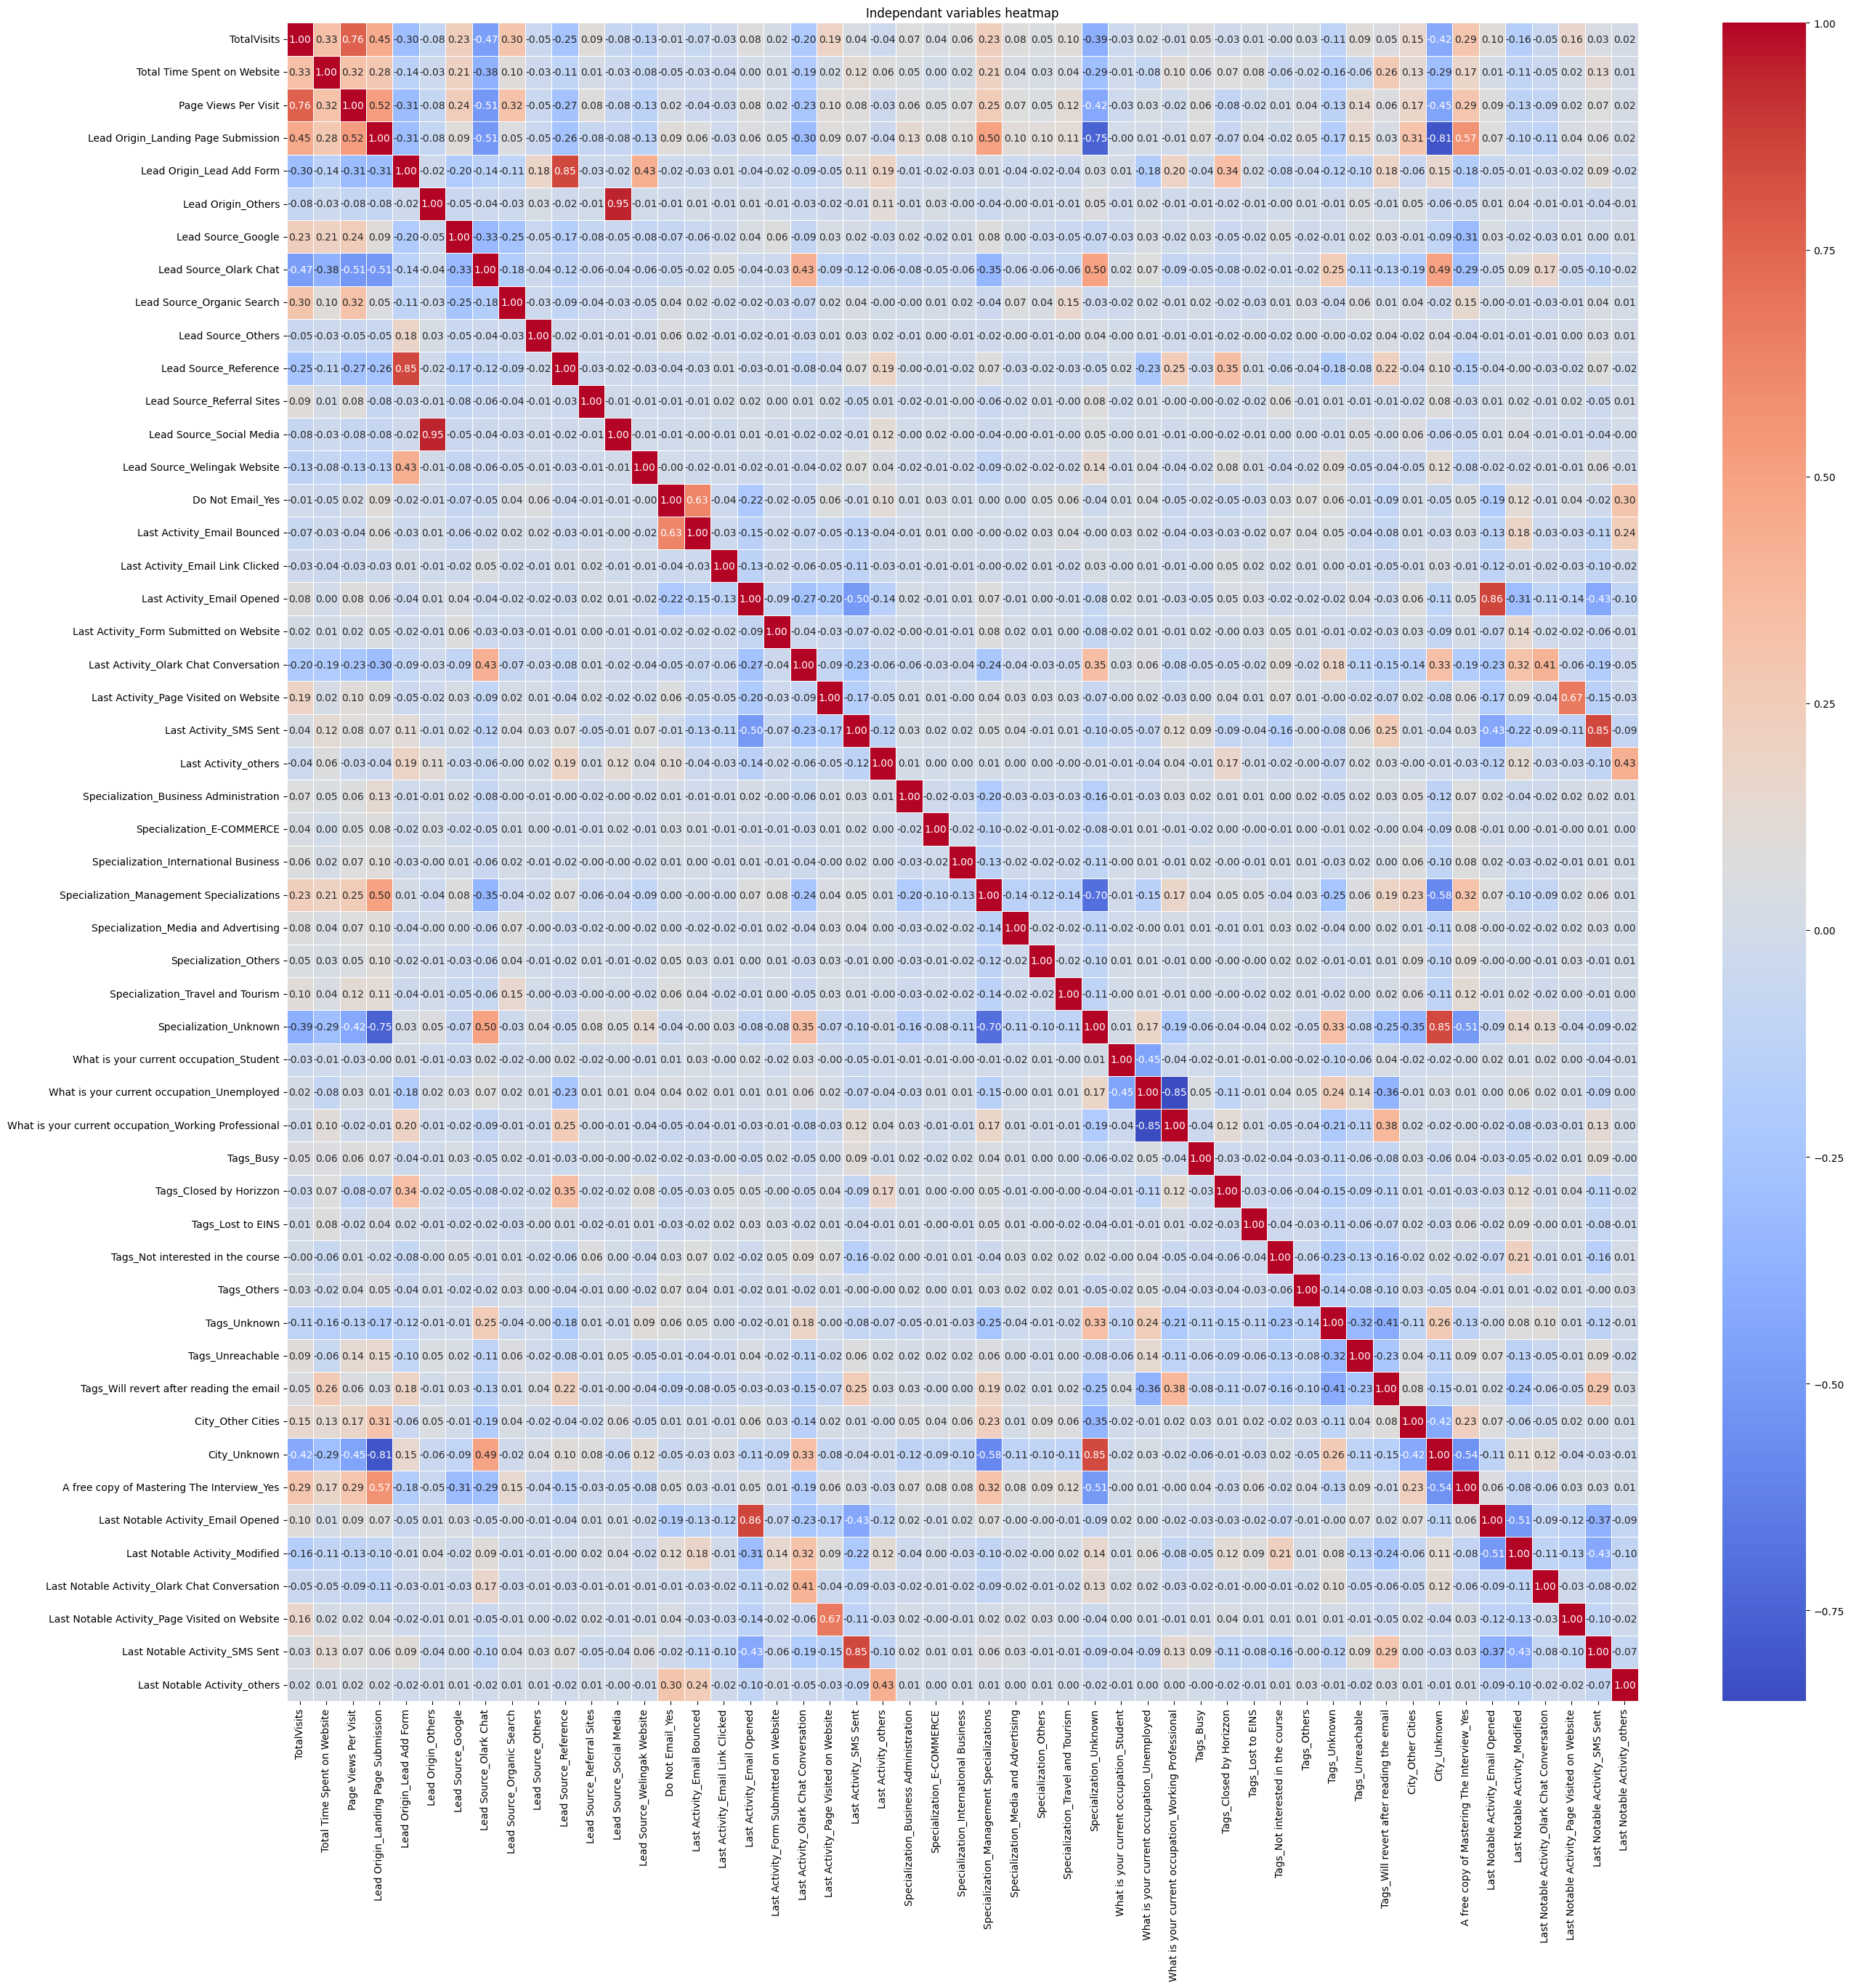

In [103]:
# Plot the heatmap with correlation matrix

plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Independant variables heatmap')
plt.show()

# Outcome of correlation : 

**Columns Identified with high Multi-collinearity**

- Last_activity
- Last notable activity
- City (unknown values) are showing surprising Negative correlation with Lead Origin_landing page Submission
- Specialization (Unknown values) are also showing surprising negative correlation with Lead Origin_landing page Submission.
City Unknown + corr with Specialization Unkown


From this, the inference I'm drawing out is that Dropping the Nulls instead of marking them as "Unknown" in City and Specialization columns could be a better option as it is anyway bringing the collinearity. However, for now, instead of dropping full column, we'll identify the encoded columns with linearity and drop them to proceed ahead. 

In [104]:
# Detecting Multi-Collinearity using VIF method to drop inter-related independant features. 
# Usual method for removing such columns is to remove them one by one and re-check the VIF score for each feature. 
# could be a lengthy process - defining a function and calling it in a loop to do it with less code repetition.

# Function to compute VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Removing Intercept before computing VIF
X = final_x.drop(columns=['Intercept'], errors='ignore')

# Iteratively remove features with high VIF
threshold = 5  # Set threshold for VIF
while True:
    vif_data = calculate_vif(X)
    max_vif = vif_data["VIF"].max()
    
    if max_vif < threshold:  # Stop if all VIF values are below the threshold
        break
    
    drop_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
    print(f"Removing '{drop_feature}' with VIF: {round(max_vif,1)}")
    X = X.drop(columns=[drop_feature])  # Drop the feature with highest VIF

# Final VIF table after removing multicollinearity
print("\nFinal VIF DataFrame:")
print(calculate_vif(X))


Removing 'What is your current occupation_Unemployed' with VIF: 121.5
Removing 'Lead Origin_Lead Add Form' with VIF: 50.2
Removing 'Last Notable Activity_Email Opened' with VIF: 23.6
Removing 'Specialization_Unknown' with VIF: 13.7
Removing 'Last Activity_SMS Sent' with VIF: 10.9
Removing 'Lead Origin_Others' with VIF: 10.1
Removing 'Lead Origin_Landing Page Submission' with VIF: 8.2
Removing 'Page Views Per Visit' with VIF: 6.6
Removing 'Last Activity_Email Opened' with VIF: 5.9
Removing 'Tags_Unknown' with VIF: 5.0

Final VIF DataFrame:
                                              Feature       VIF
0                                         TotalVisits  3.776272
1                         Total Time Spent on Website  2.498008
2                                  Lead Source_Google  2.840219
3                              Lead Source_Olark Chat  2.769970
4                          Lead Source_Organic Search  1.703093
5                                  Lead Source_Others  1.053308
6      

- A Good amount of "Unknown" values (which were originally Nulls) have been removed in VIF detection process. Which means - there should not be any need to go back to EDA to remove the Nulls. 
- Hence, we'll move ahead with the Modelling process. If need be, will review the process again basis the result quality. 

- the refined dataframe X is now left with 40 columns. let us run the correlation heatmap once again to have a visual confirmation as well

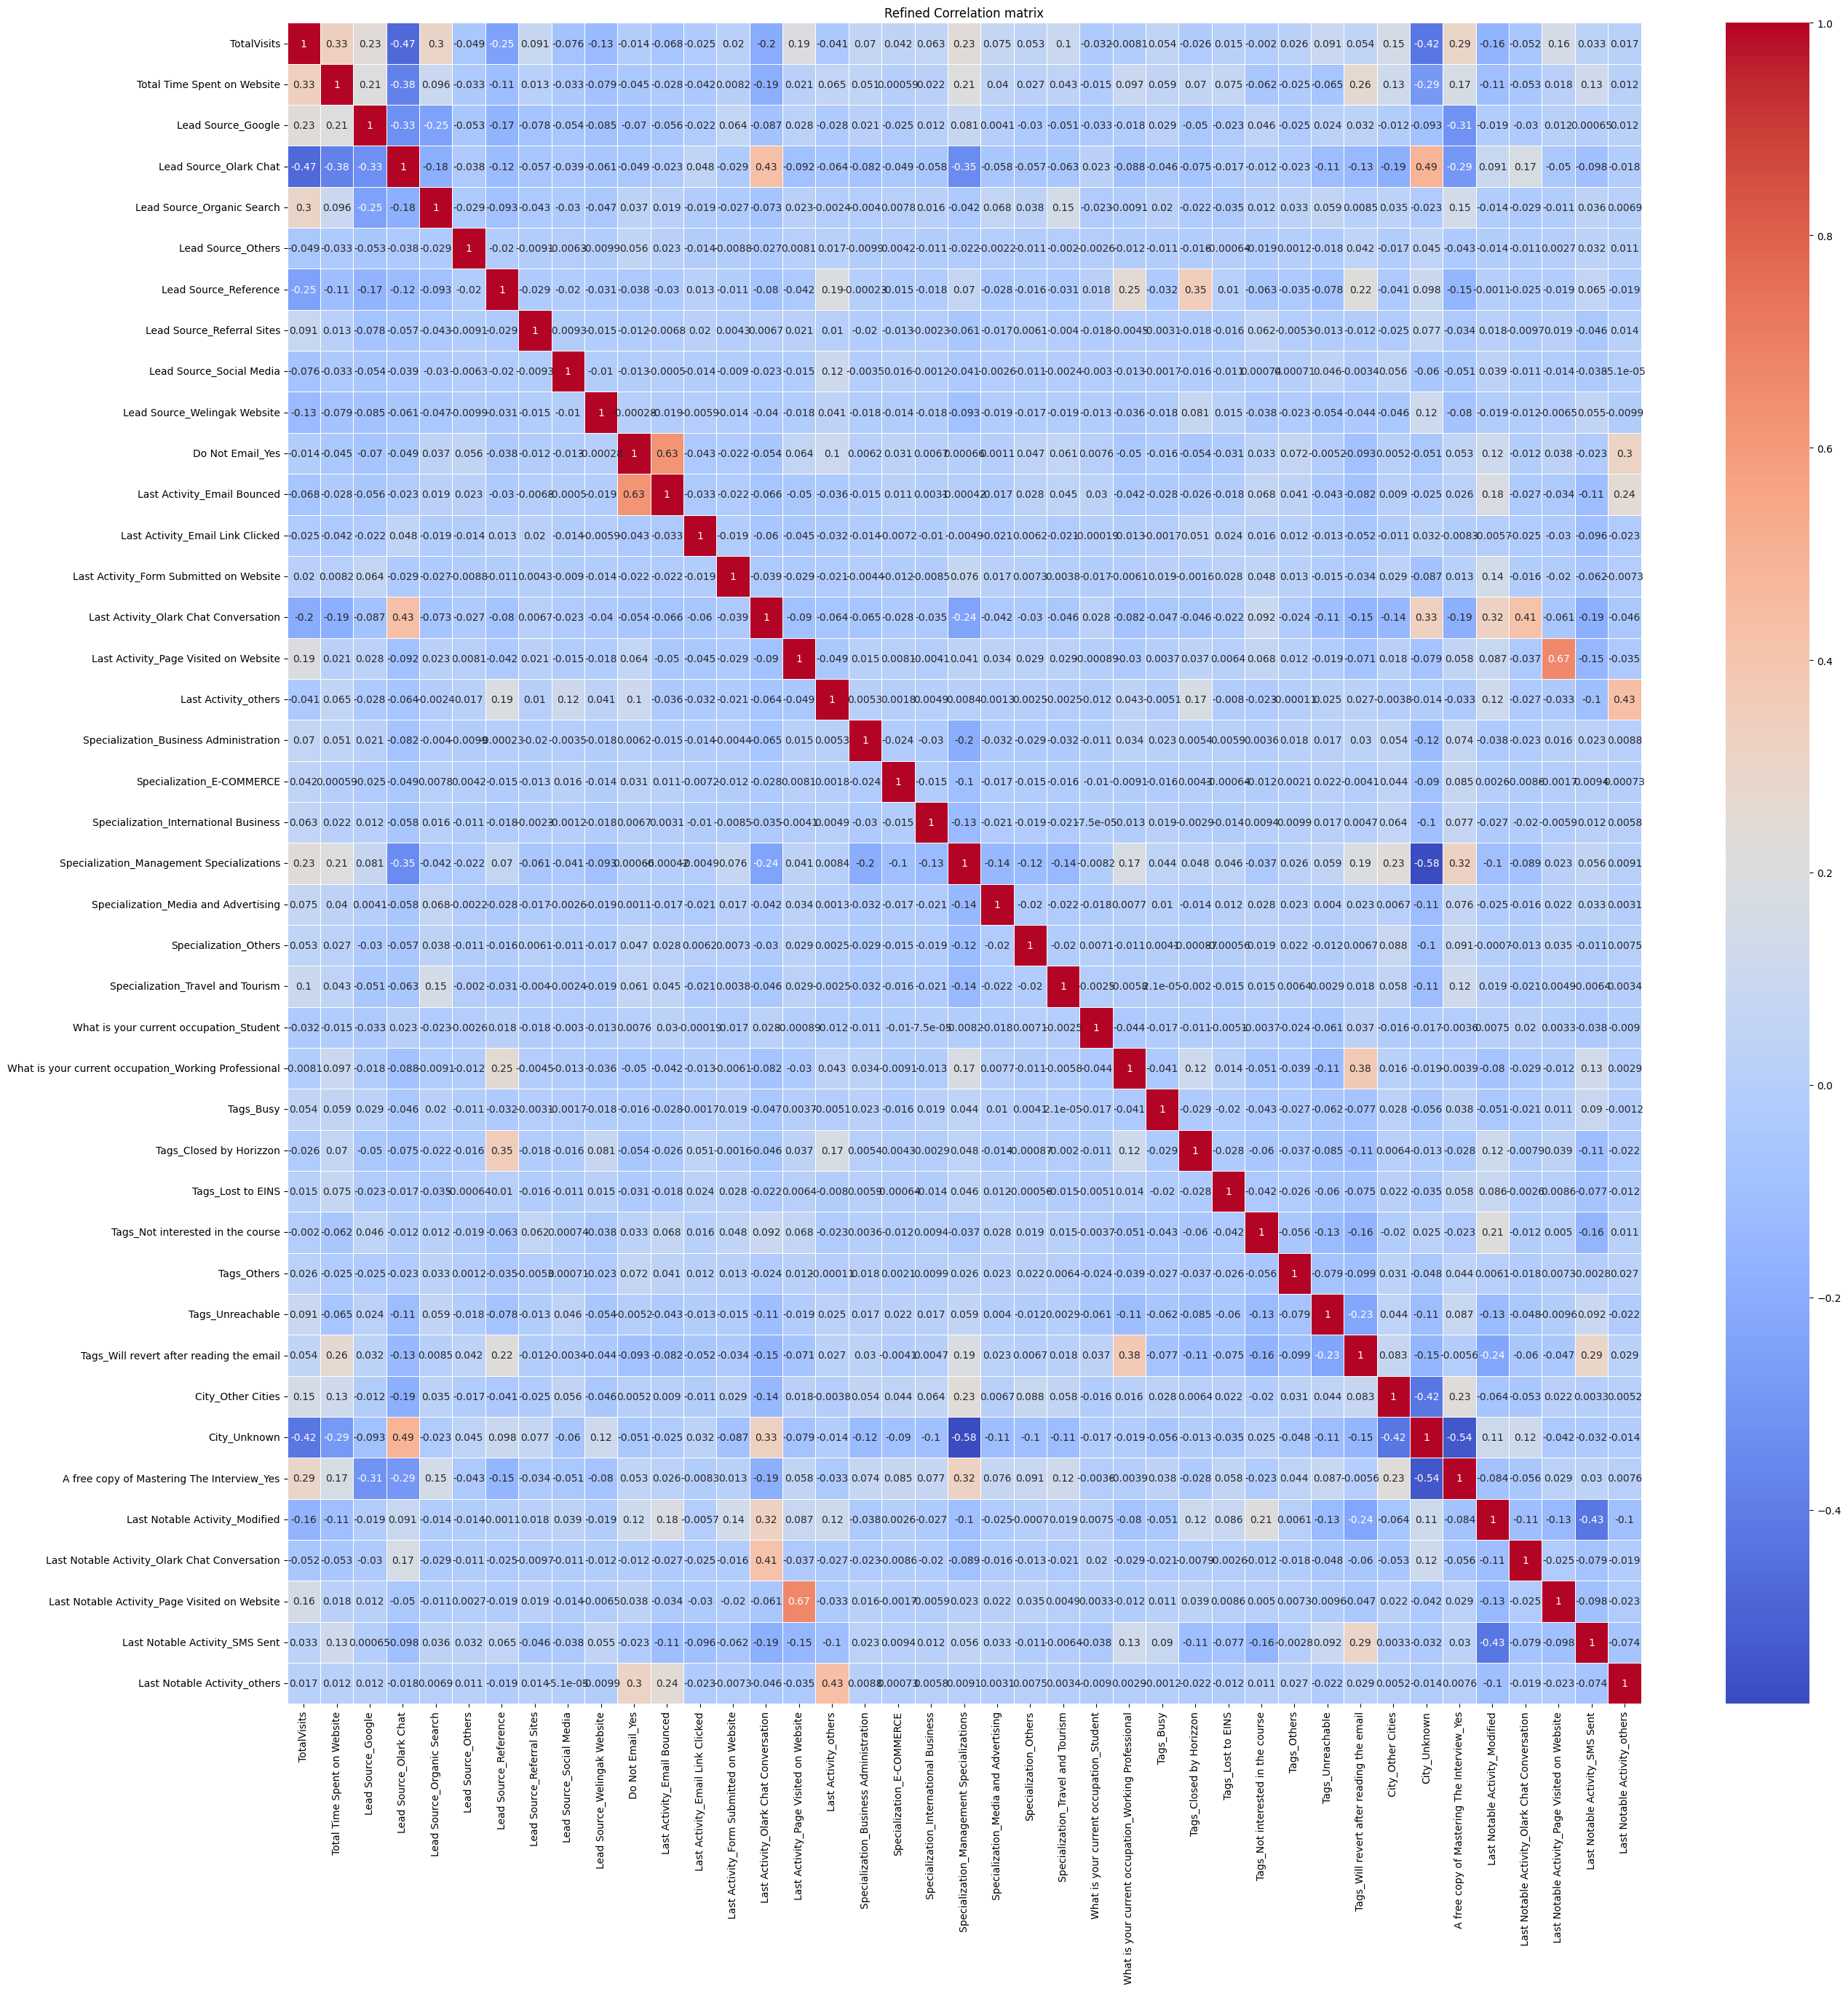

In [105]:
corr_matrix = X.corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Refined Correlation matrix')
plt.show()

***looks better than before - Even though some collinearity still is visible but we shall proceed ahead since the VIF process has already done its job to remove the inter-related x features.***

# Beginning Model Training 

In [106]:
# Step 1: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, lead_output, test_size=0.3, random_state=32, stratify=lead_output)


In [107]:
# Step 2 :  Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Step 3 :  Logistic Regression with L2 (Ridge) Regularization
reg_model_l2 = LogisticRegression(penalty='l2', C=1, solver='liblinear', random_state=32)
reg_model_l2.fit(X_train_scaled, y_train)


LogisticRegression(C=1, random_state=32, solver='liblinear')

In [108]:
# Step 4 : Searching the right value of lamba (C value) by trials

# Define parameter grid
param_grid = {'C': [0.005, 0.01,0.015, 0.02,0.04,0.08, 0.1, 0.5, 0.8,1,1.5]}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear', random_state=42),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print best C value
print("🔹 Best C Value:", grid_search.best_params_['C'])
print("🔹 Best Accuracy:", grid_search.best_score_)


🔹 Best C Value: 0.02
🔹 Best Accuracy: 0.9277875015649432


going ahead to train the model with attained best C value 

In [109]:
# Step 3 : Re-Fitting the model as per the best C value (0.02)
# Logistic Regression with L2 (Ridge) Regularization

###### HOLDING IT FOR NOW. TO TEST THE K FOLD CROSS VALIDATION IN UPPER CODE PIECE. 

reg_model_l2 = LogisticRegression(penalty='l2', C=0.02, solver='liblinear', random_state=32)
reg_model_l2.fit(X_train_scaled, y_train)

LogisticRegression(C=0.02, random_state=32, solver='liblinear')

- Model building is done. Evaluations to be taken now 

In [110]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score

# Get prediction probabilities
y_probs = reg_model_l2.predict_proba(X_test_scaled)[:, 1]

# Calculate Precision-Recall AUC
pr_auc = average_precision_score(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

print(f"Precision-Recall AUC: {pr_auc:.4f}")  # Preferred for imbalanced data
print(f"ROC AUC: {roc_auc:.4f}")  # Less meaningful for imbalanced data


Precision-Recall AUC: 0.9646
ROC AUC: 0.9738


- so far the result found is as following : 
    - **Precision-Recall AUC: 0.9646**
    - **ROC AUC: 0.9738**

- Indicates that this model is performing excellently to predict the right leads. 

In [111]:
# Step 4 :  Predictions. Putting Test data to model and getting the predicted value from this model. 
y_pred = reg_model_l2.predict(X_test_scaled)

# Model evaluation by comparing Actual Y value (Test dataset) vs predicted values of Y

print("Model Accuracy:", round(accuracy_score(y_test, y_pred)*100,1))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 92.9

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      1682
           1       0.93      0.88      0.90      1054

    accuracy                           0.93      2736
   macro avg       0.93      0.92      0.92      2736
weighted avg       0.93      0.93      0.93      2736



- Model accuracy is highly promising : ~ 93 % 
- Precision as well as Recall is very high. > 90%
- Also, F1 Score is above 90%

**So far, the model outcome looks promising. Let us verify with:** 
- ROC Curve and AUC value
- Confusion matrix
 

ROC-AUC Score: 0.9737949761623803


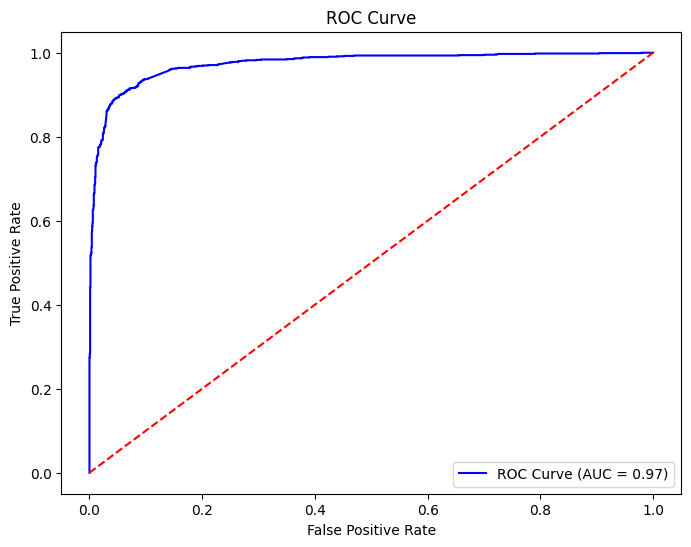

In [112]:
# Step 4.2 - Establishing model capability with help of ROC curve . 

# Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")  # Random chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

- The outcome of ROC curve indicates that this model has almost perfect capability to distinguish the two classes. In short, Model is capable to detect the Good leads. 

- Even though the AUC value (0.97) seems too good and may indicate overfitting.. however we have already applied Ridge regularization on the model to avoid overfitting. need to keep in mind about the constraints until results are established. 

<Figure size 600x600 with 0 Axes>

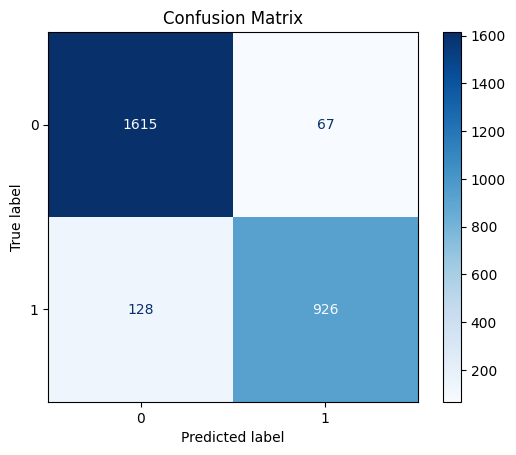

In [113]:
#  Step 4.3 : 
# Compute Confusion Matrix to vaidate the model capability to distinguish the good and bad calls. 
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=reg_model_l2.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


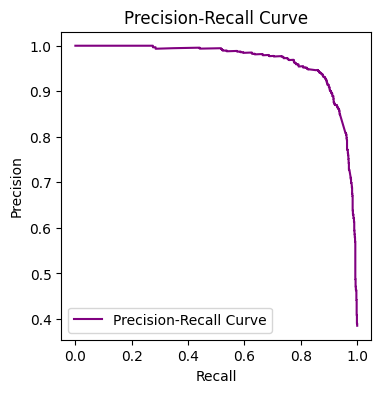

In [114]:
# Step 4.3 : Calculating precision, recall 

precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(4, 4))
plt.plot(recall, precision, color="purple", label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


the Precision-recall curve remains close to 1 for a major part of Recall. Indicator of a good model . 

# Conclusion of Model capability
**Since no indicator of model is indicating any problem with model training and testing also is meeting the success requirement, There is no reason found yet so far to doubt on the model. Hence , going ahead with the lead Score calculation** 

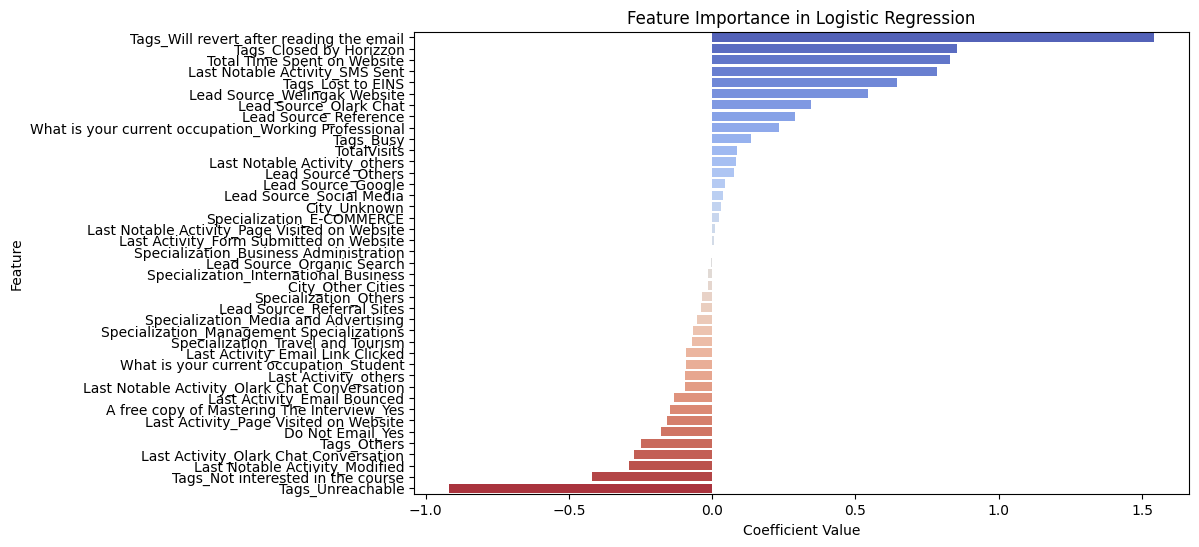

In [115]:
# Extract features that impact the Model significantly. 
# Bigger the bar (Positive or Negative) , higher the impact on results.

coefficients = reg_model_l2.coef_[0]
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Coefficient": coefficients})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance["Coefficient"], y=feature_importance["Feature"], palette="coolwarm")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.show()


**This gives answer to the first question we had:** 
- Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?
    - 1. Tags : 
        Will revert after reading the email ;
        Closed by Horizzon 
    - 2. Total Time spent on  Website
    - 3. Lead Source ;
        welingak Website ; 
        Olark Chat ; 
        Reference
    - 4. Last Notable Activity 
        SMS Sent ;
        Others
        
        


Bigger the bar (positive or negative), higher the impact on the Outcome (Hot leads selection)

# Evaluating the outcome for the company if it follows the Predictions of this model.

- Convert prediction to a lead score by using probability threshold at a suitable value
- Compare the prediction with actual outcome (in test data) to find success rate.
- Check if the hot leads success is above 80% or not. 

In [116]:
# Step 5: Check Predictions probability 

y_pred = (y_probs >= 0.5).astype(int)  # Classify based on threshold 0.5


In [117]:
# Step 6: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_probs)
conf_matrix = confusion_matrix(y_test, y_pred)

In [118]:
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"AUC-ROC: {auc:.3f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.929
Precision: 0.933
Recall: 0.879
F1 Score: 0.905
AUC-ROC: 0.974

Confusion Matrix:
 [[1615   67]
 [ 128  926]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      1682
           1       0.93      0.88      0.90      1054

    accuracy                           0.93      2736
   macro avg       0.93      0.92      0.92      2736
weighted avg       0.93      0.93      0.93      2736



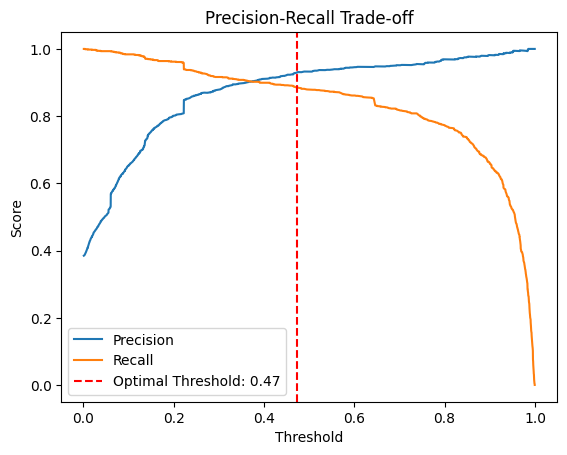

Optimal Threshold (Max F1-score): 0.473


In [119]:
# Step 4: Optimize Threshold Trade-off based on Precision-Recall Curve

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# # Compute F1-score for each threshold
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
optimal_threshold = thresholds[f1_scores.argmax()]

# Plot Precision-Recall Trade-off
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.axvline(optimal_threshold, color='r', linestyle='--', label=f"Optimal Threshold: {optimal_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall Trade-off")
plt.show()

# Print the optimal threshold
print(f"Optimal Threshold (Max F1-score): {optimal_threshold:.3f}")

# Apply optimal threshold to make final predictions
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

In [120]:
# Find the best threshold based on business needs

best_threshold_index = (precision + recall).argmax()
best_threshold = thresholds[best_threshold_index]
print(f"Optimal Classification Threshold: {best_threshold:.3f}")

Optimal Classification Threshold: 0.473


- **Optimal Classification Threshold = 0.473. Applying it to get the best Accuracy.**

In [121]:
y_pred_optimal = (y_probs >= 0.473).astype(int)
optimal_accuracy = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy with Optimized Threshold: {optimal_accuracy:.3f}")

Accuracy with Optimized Threshold: 0.931


In [122]:
# Step 7: Convert the Predictions made to a Lead Score. This should be used by  the Client to decide whether to use a lead or drop it. 

df_lead_scores = pd.DataFrame({"Lead Score": (y_probs * 100).round(2), "Converted": y_test.values})

In [123]:
df_lead_scores

# Now we have a Lead score against each lead for the Test data (y_test) . we can use this lead score to find out if the score is predicting the outcome correctly or  incorrectly. 

Lead Score  Converted
0           0.38          0
1           3.54          0
2          12.83          1
3           5.62          0
4          93.07          0
...          ...        ...
2731        0.45          0
2732       36.62          1
2733        1.83          0
2734       99.62          1
2735        0.91          0

[2736 rows x 2 columns]

In [124]:
#  Having Lead score was good. But Client needs a decision. 
# Client wants to know whether to put resources on a lead or not.. the decision has to be a  Go / No go basis (Classification outcome is expected.)
# Testing the Lead score success Rate . Assuming - I am giving 55% as threshold to the client to choose Hot leads.


df_lead_scores['hot_lead'] = np.where(df_lead_scores['Lead Score']>=55, 1,0) 
df_lead_scores

Lead Score  Converted  hot_lead
0           0.38          0         0
1           3.54          0         0
2          12.83          1         0
3           5.62          0         0
4          93.07          0         1
...          ...        ...       ...
2731        0.45          0         0
2732       36.62          1         0
2733        1.83          0         0
2734       99.62          1         1
2735        0.91          0         0

[2736 rows x 3 columns]

- In above code piece, what we have got is hot_lead prediction indicated by the Model for each lead.
- This can easily be  compared with the actual outcome. if Results match = model works well. 
- Higher the match , better the model capability is. 

In [125]:
#  Lets compare "Converted" to "hot_lead" and evaluate the outcome.


def lead_outcome(row):
    if row['Converted']==1 and row['hot_lead']==1 :
        return "Good selection"
    if row['Converted']==1 and row['hot_lead']==0 :
        return "Missed Lead"
    if row['Converted']==0 and row['hot_lead']==1 :
        return "Bad selection"
    if row['Converted']==0 and row['hot_lead']==0 :
        return "Good drop"
    
df_lead_scores['lead_status'] = df_lead_scores.apply(lead_outcome , axis=1)

df_lead_scores

Lead Score  Converted  hot_lead     lead_status
0           0.38          0         0       Good drop
1           3.54          0         0       Good drop
2          12.83          1         0     Missed Lead
3           5.62          0         0       Good drop
4          93.07          0         1   Bad selection
...          ...        ...       ...             ...
2731        0.45          0         0       Good drop
2732       36.62          1         0     Missed Lead
2733        1.83          0         0       Good drop
2734       99.62          1         1  Good selection
2735        0.91          0         0       Good drop

[2736 rows x 4 columns]

- **Now we know which Prediction was good and which wasn't.** 
- **we Also know how much good leads were missed, how many bad leads were predicted (which means wasted resources).**

In [126]:
df_lead_scores['lead_status'].value_counts()

lead_status
Good drop         1622
Good selection     920
Missed Lead        134
Bad selection       60
Name: count, dtype: int64

In [127]:
# Client wants to achieve the lead conversion above 80%. lets see if we get there. 
# Dividing Good selection by all selected leads

total_leads_selected = df_lead_scores[df_lead_scores['lead_status']=='Good selection'].shape[0]+df_lead_scores[df_lead_scores['lead_status']=='Missed Lead'].shape[0]
total_successful_leads = df_lead_scores[df_lead_scores['lead_status']=='Good selection'].shape[0]

success_rate = round(total_successful_leads*100/total_leads_selected,1)

print(f'success rate of hot leads as per this model :  {success_rate} %')


success rate of hot leads as per this model :  87.3 %


# PROJECT CONCLUSION

**Major Takeaways for Client**

- The model that is built for the customer as per this data  achieves a success rate of 87.3 % . In real life, considering unknown situations, we can safely say  that this model would perform its job well.

- Following this model , the  company can utilize their resources on right points and get their lead success to a very  good level - Presumably above 80% as the model is suggesting.

- One more thing  that this model allows Company to do is to understand which  of the leads are at the borderline case. means - which of the leads could be converted to Success rate (but presently  the chances of their conversion may not  be very bright). These leads are those where the lead score is probably between 50% to 70%. 

- Above point could be very useful to company to decide where to put extra efforts to increase their sales.

- Last but not the least - Following plot tells user which parameters are the most important ones  that are majorly deciding how a lead could be converted - both ,  in favour or against . 
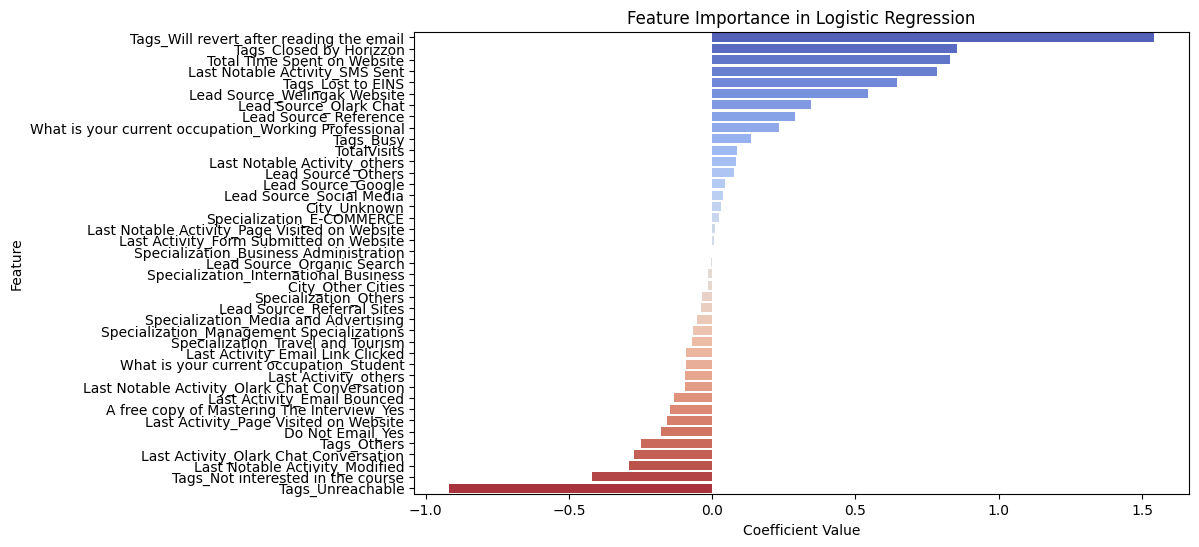

**Major Takeaways from the Project for learner like myself**

- Usually  the  data that we would get won't always be clean. Cannot be directly fed to model. 
- Nulls and Outliers deteriorat ML models badly. Hence, need to be handled carefully, while  ensuring we do not lose vital information that could potentially change the model capability. 
- Many of the  features needed optimization like categorization of the data , grouping multple small categories to one. etc . Usually such information would be from Business or would vary by case to case. 
- Independant variables could have collinearity among themselves which would  be detrimental to the Model outcome. Hence, needs to be  removed. 
- Since we're dealing with many variables at same time,regularization was important . 
- Usage of right limit  to decide the best conversion percentage was important to bring a desired outcome. 

**Summary  of the major steps followed :** 
- performed EDA . left with 9 clean columns
- applied dummies . converted to a decent sized 46 columns.
- applied VIF function to remove multi-collinear features - left with 40 features . 
- Standardizing the features
- applied logistic regression
- Searching the right value of lamba (C value) by trials using Gridsearch
- Re-Fitting the model as per the best C value

**model building finished here.  Evaluation and testing of model started here afterwards:**

- Predictions. Putting Test data to model and getting the predicted value from this model.
Model evaluation by comparing Actual Y value (Test dataset) vs predicted values of Y

- Establishing model capability with help of ROC curve . 
Calculating Predict probabilities for ROC Curve using x test scaled data on predict_proba function. 

- Compute Confusion Matrix to vaidate the model capability to distinguish the good and bad calls. 
- Calculating precision, recall 

(also, Extract features that impact the Model significantly. 
Bigger the bar (Positive or Negative) , higher the impact on results.)

- Model Evaluation by finding accuracy, recall, precision, F1-Score , auc , confusion_matrix

- Optimize Threshold Trade-off based on Precision-Recall Curve
Compute Precision-Recall curve
- checking Accuracy with Optimized Threshold

***FINALLY :*** 

- Calculating Lead score 
- Using lead scores >50 to convert to a recommneded HOT LEAD.
- compare actual "Converted" to HOT LEAD to get success rate. 



**Conclusion : This project gave a practical understanding about how an ML Model could bring wonderful benefits to a company's business if rightly used by reducing their resources cost and maximizing their profitability.**